
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

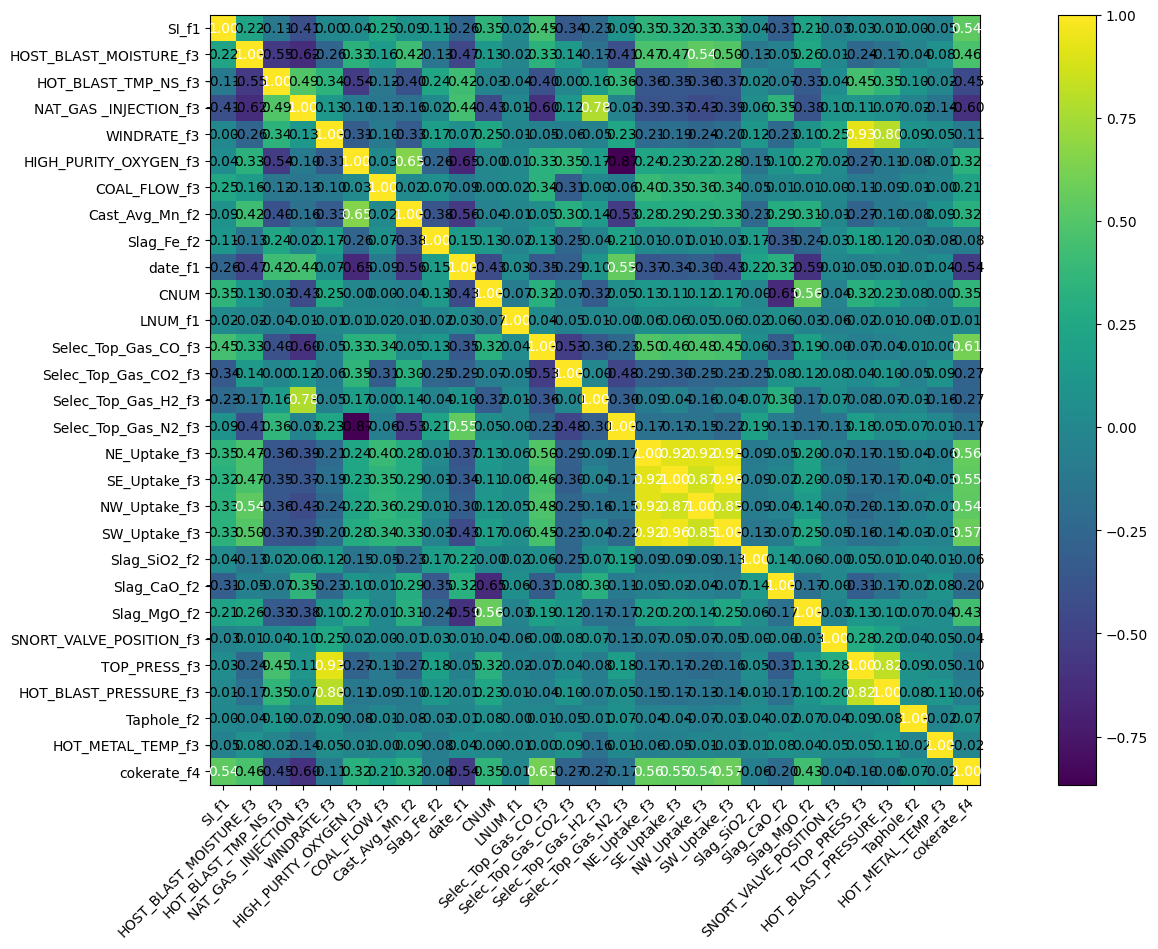

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

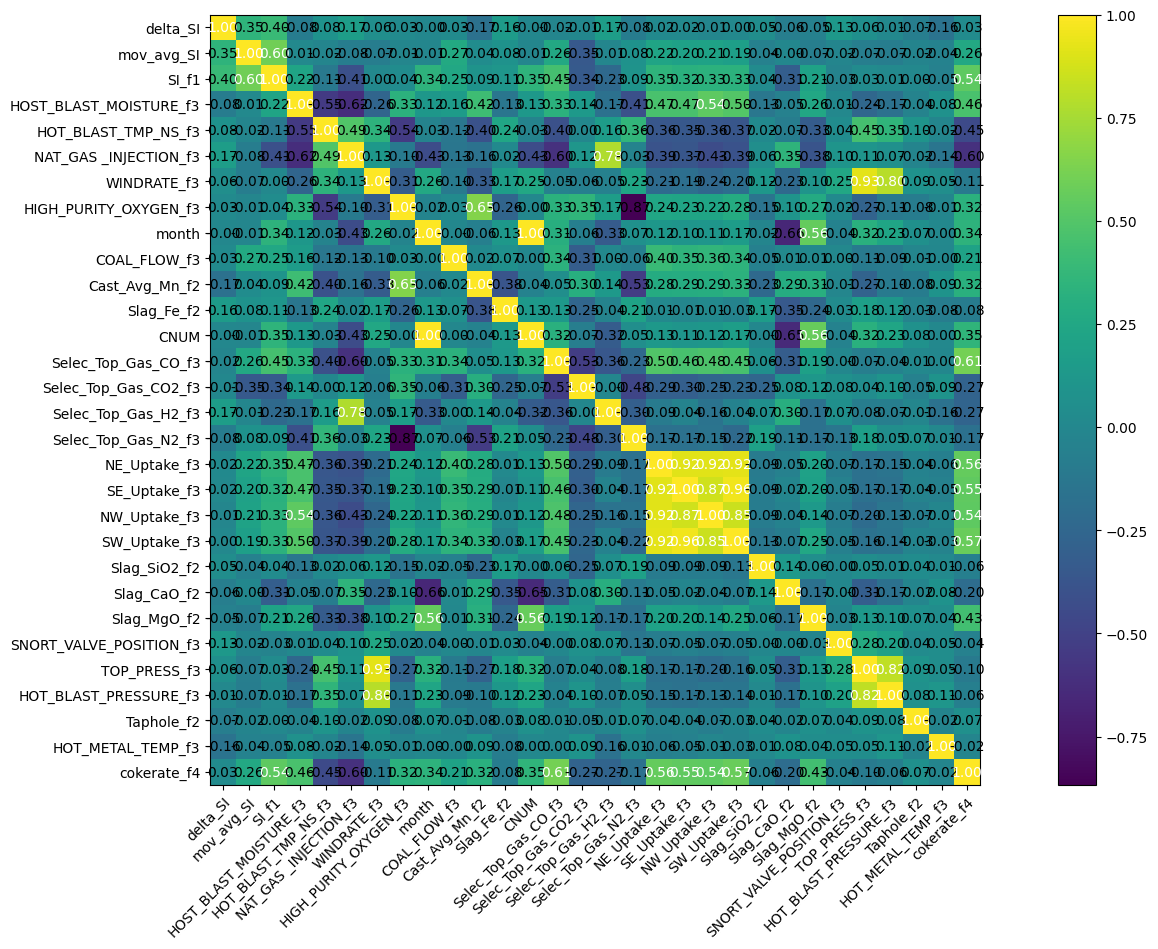

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        pred = idx_pred[:, -1:, :]
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        
        ###################################################################################
        
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
        ###################################################################################
        
        loss_just_last   = criterion( pred, y_train)   ## just 9th of 9
        
        ## print(idx_pred.shape)
        ## print(yb.shape)
        ## print(xb.shape)
        ## print(idx_pred[:,-10:, :].shape)
        loss_full_seq    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 9 of 9
        
        all_sequence = True
        
        if all_sequence:
            loss_all = loss_full_seq
        else:
            loss_all = loss_just_last
        
        ###################################################################################
        
        
        ## loss_SI  = criterion(pred_si, y_si)    
        loss_mse  = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        ## loss_SI_main = criterion(pred_si, y_si)
        y_si_early   = yb[:, :1, 2]                  # first 4 steps of SI ground truth
        si_mean_early = y_si_early.mean(dim=1)       # average over early steps
        early_penalty = F.mse_loss(pred_si, si_mean_early)
        beta    = 0  # how much to weigh the early trend alignment (can try 0.2–0.4)
        ## beta       = 0.3 * (1 - batch_i / tsGPT_obj.max_iters)

        loss_SI = (1 - beta) * loss_SI_main + beta * early_penalty
        
        
        ##################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.574795
Loss_SI: 0.5073849558830261 Loss_all: 1.1814846992492676
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.092140
Loss_SI: 0.028312241658568382 Loss_all: 0.6665892004966736
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.070396
Loss_SI: 0.023984016850590706 Loss_all: 0.4881012737751007
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.059187
Loss_SI: 0.022068439051508904 Loss_all: 0.39325761795043945
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.040423
Loss_SI: 0.00788616482168436 Loss_all: 0.3332498073577881
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.040297
Loss_SI: 0.010755198076367378 Loss_all: 0.30616843700408936
Prediction shape: torch.Size([32, 35])
===


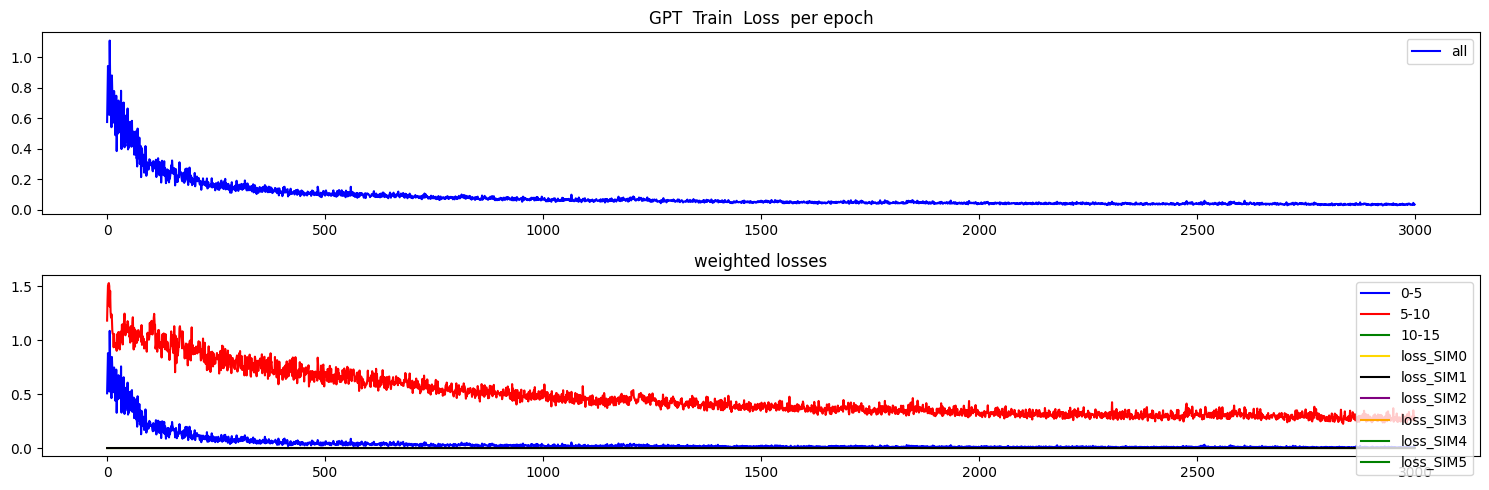

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


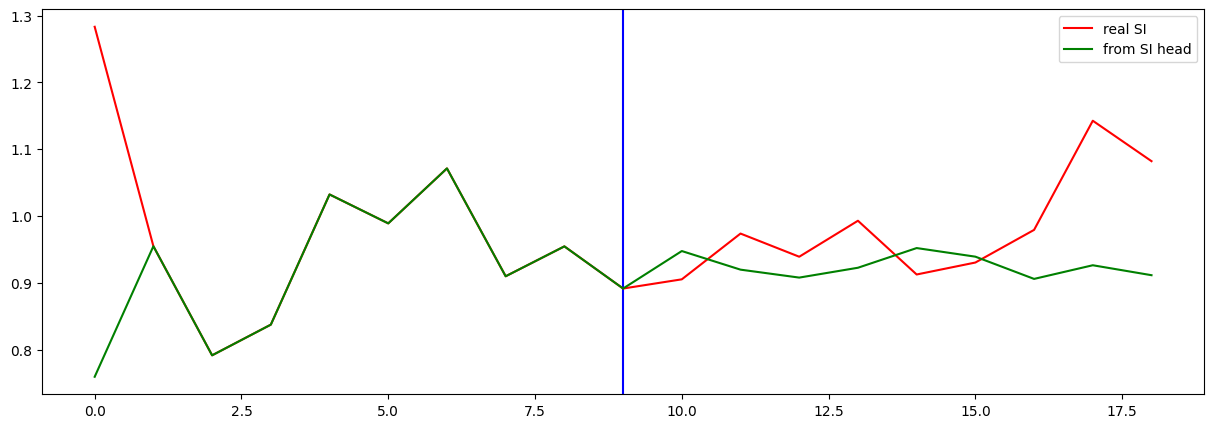

Testing R**2 - (all) - (no inputs):  0.9982645672959396
Testing R**2 - (f2) - SI full (no inputs):  -1.474647944710457
Testing R**2 - SI head only (no inputs):  -0.9325100623865559
0 ...index R**2 (no inputs):  -1.0298421309810193
1 ...index R**2 (no inputs):  -1.0130832379423818
2 ...index R**2 (no inputs):  -1.474647944710457
3 ...index R**2 (no inputs):  -21.49103572095965
4 ...index R**2 (no inputs):  -3.6351079974572267
5 ...index R**2 (no inputs):  -4.414672530300608
6 ...index R**2 (no inputs):  -75.91623648125568
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4982954904993213
10 ...index R**2 (no inputs):  0.5150099154266274
11 ...index R**2 (no inputs):  -39.12403665019304
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.1395770114048362
16 ...index R**2 (no inputs):  -0.2033884597299036
17 ...index R**2 (no inputs):  -68.7497909385751

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.845810
Loss_SI: 0.8205469846725464 Loss_all: 1.073176622390747
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.152201
Loss_SI: 0.08009833842515945 Loss_all: 0.8011206984519958
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.086973
Loss_SI: 0.04710352420806885 Loss_all: 0.44579577445983887
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.076552
Loss_SI: 0.03595210239291191 Loss_all: 0.44194892048835754
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.061615
Loss_SI: 0.023641766980290413 Loss_all: 0.4033757746219635
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.060315
Loss_SI: 0.019278207793831825 Loss_all: 0.42964622378349304
Prediction shape: torch.Size([32, 35])
===


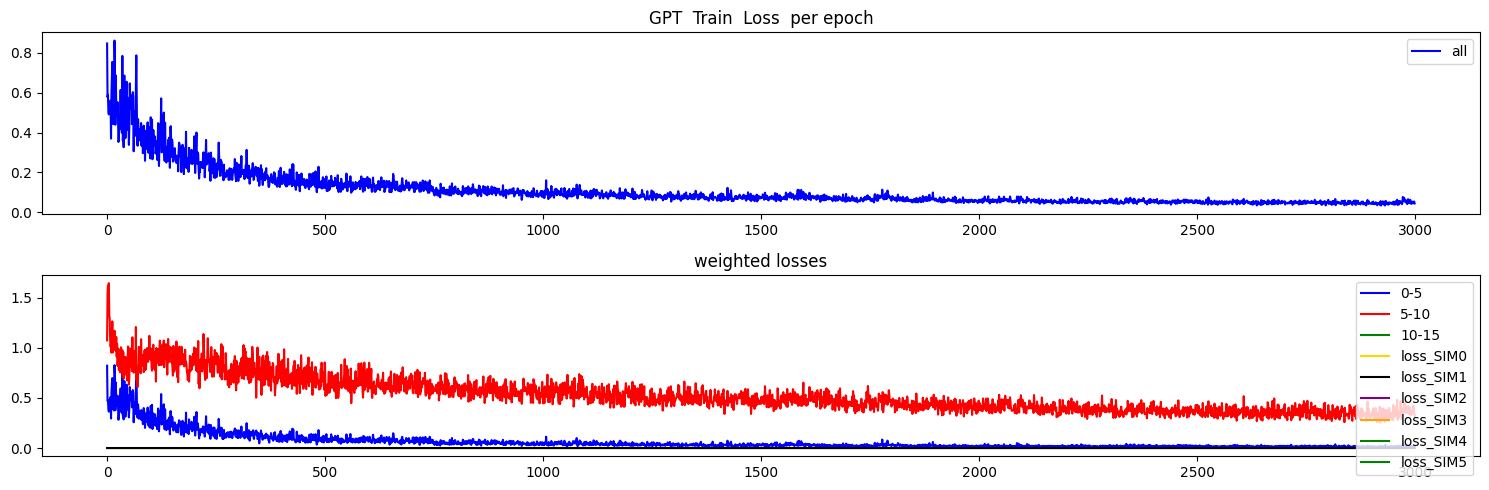

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


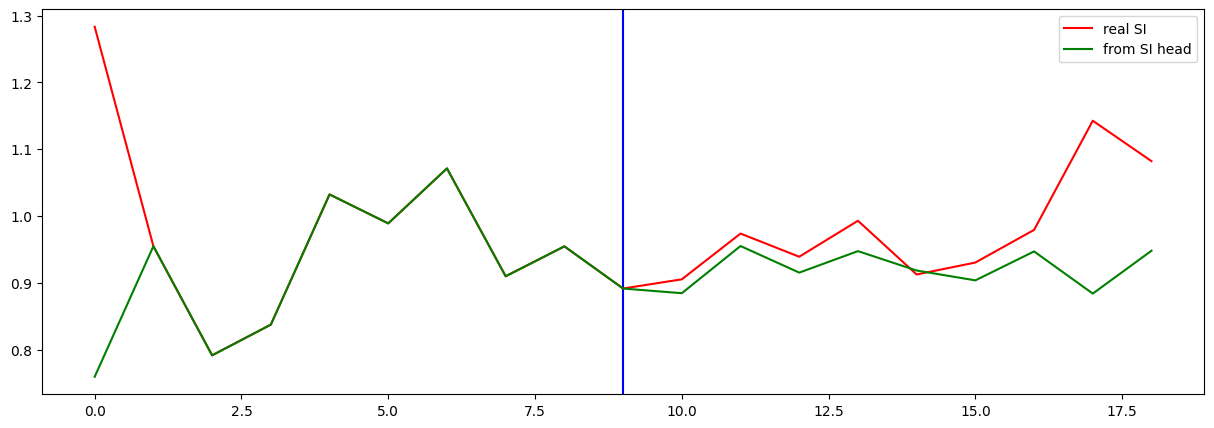

Testing R**2 - (all) - (no inputs):  0.9989552196779795
Testing R**2 - (f2) - SI full (no inputs):  -0.9799868020001634
Testing R**2 - SI head only (no inputs):  -0.7819823425529919
0 ...index R**2 (no inputs):  -0.7003252541395528
1 ...index R**2 (no inputs):  -0.42259385190936194
2 ...index R**2 (no inputs):  -0.9799868020001634
3 ...index R**2 (no inputs):  -437.06171263447993
4 ...index R**2 (no inputs):  -9.8054287767733
5 ...index R**2 (no inputs):  -2.198085247102742
6 ...index R**2 (no inputs):  -178.58525544566774
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.38016075091348966
10 ...index R**2 (no inputs):  0.7000076132916075
11 ...index R**2 (no inputs):  -442.432804775541
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.123690022218211
16 ...index R**2 (no inputs):  -0.4438134988828826
17 ...index R**2 (no inputs):  -15.020427774987

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.594026
Loss_SI: 0.5329117774963379 Loss_all: 1.144055724143982
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.246971
Loss_SI: 0.161472350358963 Loss_all: 1.0164546966552734
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.154305
Loss_SI: 0.0836666002869606 Loss_all: 0.790054202079773
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.146189
Loss_SI: 0.08596240729093552 Loss_all: 0.6882331967353821
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.084234
Loss_SI: 0.029863202944397926 Loss_all: 0.5735749006271362
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.084084
Loss_SI: 0.039505258202552795 Loss_all: 0.48529404401779175
Prediction shape: torch.Size([32, 35])
===


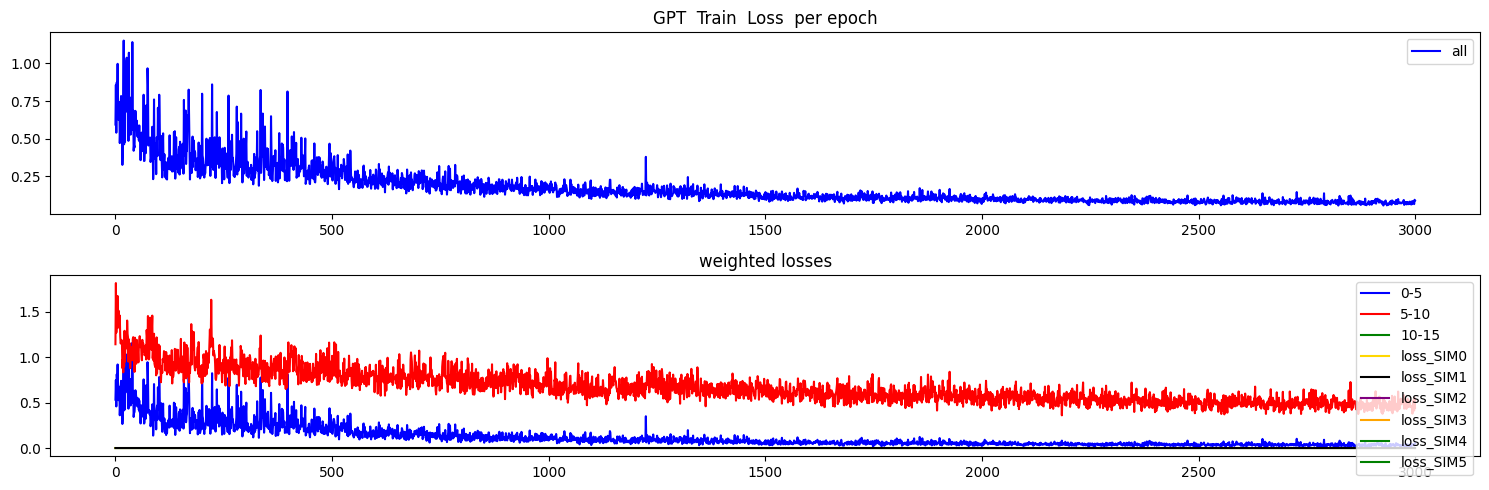

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


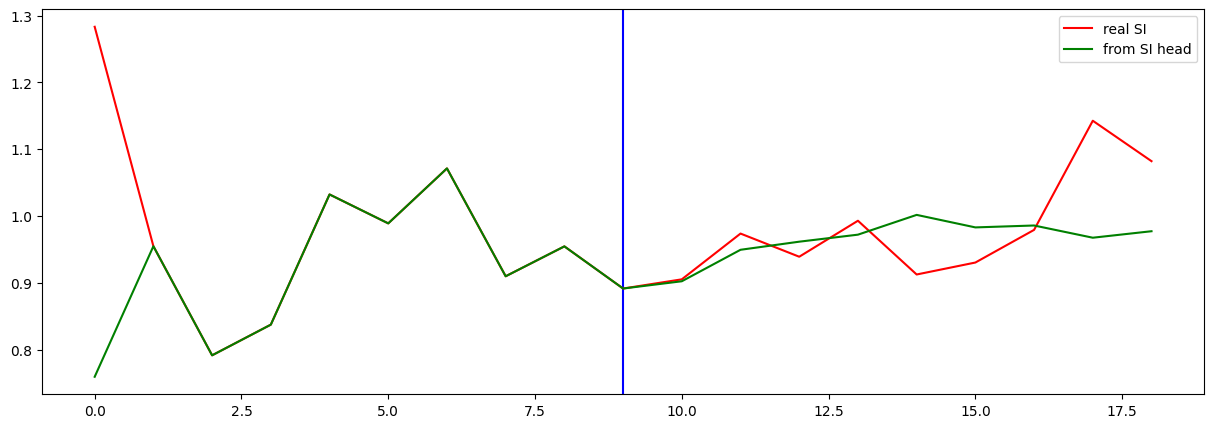

Testing R**2 - (all) - (no inputs):  0.9990737299408257
Testing R**2 - (f2) - SI full (no inputs):  -0.019168505767054533
Testing R**2 - SI head only (no inputs):  -0.2334757796862661
0 ...index R**2 (no inputs):  0.021363197676348977
1 ...index R**2 (no inputs):  -0.004792799716992757
2 ...index R**2 (no inputs):  -0.019168505767054533
3 ...index R**2 (no inputs):  -65.88791819762514
4 ...index R**2 (no inputs):  -26.48741617210811
5 ...index R**2 (no inputs):  -1.7697396275108663
6 ...index R**2 (no inputs):  -30.48738950191361
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5769168861873362
10 ...index R**2 (no inputs):  -0.35049739624837484
11 ...index R**2 (no inputs):  -125.60321741177847
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.681525538395922
16 ...index R**2 (no inputs):  -0.1443489830488014
17 ...index R**2 (no inputs):  -22.22

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.651370
Loss_SI: 0.5988963842391968 Loss_all: 1.1236294507980347
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.251466
Loss_SI: 0.1838209331035614 Loss_all: 0.8602728247642517
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.138992
Loss_SI: 0.08577242493629456 Loss_all: 0.6179709434509277
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.138965
Loss_SI: 0.07181423902511597 Loss_all: 0.7433180212974548
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.110861
Loss_SI: 0.05996839702129364 Loss_all: 0.5688990950584412
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.073124
Loss_SI: 0.02611069567501545 Loss_all: 0.49624109268188477
Prediction shape: torch.Size([32, 35])
===


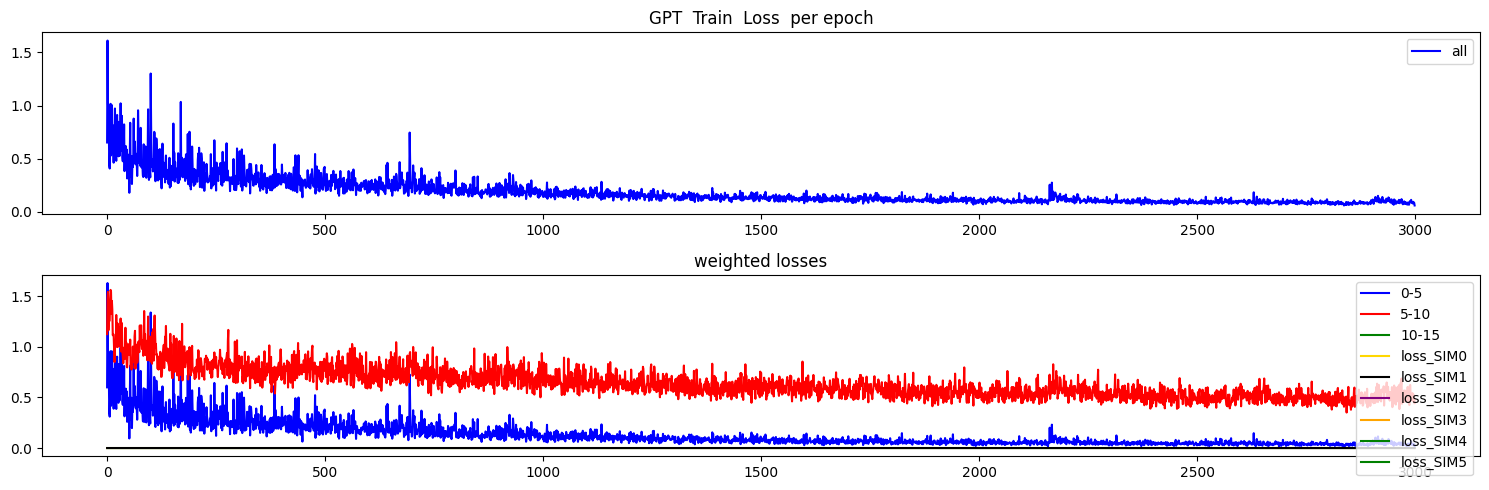

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


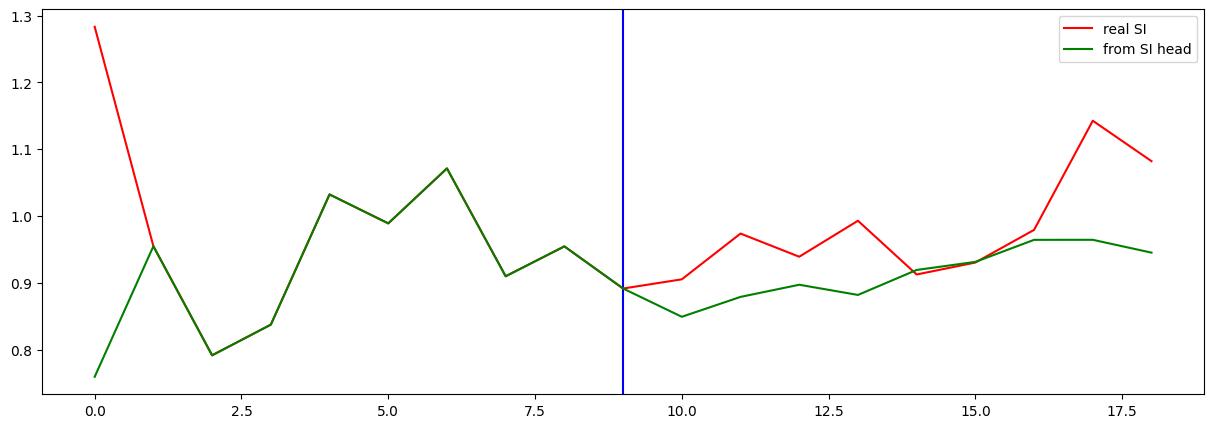

Testing R**2 - (all) - (no inputs):  0.9951884630637912
Testing R**2 - (f2) - SI full (no inputs):  -2.2533959275297875
Testing R**2 - SI head only (no inputs):  -0.6163675209051571
0 ...index R**2 (no inputs):  0.032893848546596716
1 ...index R**2 (no inputs):  -0.17910715631789875
2 ...index R**2 (no inputs):  -2.2533959275297875
3 ...index R**2 (no inputs):  -110.46039229097211
4 ...index R**2 (no inputs):  -21.676499896604092
5 ...index R**2 (no inputs):  -14.19246363285445
6 ...index R**2 (no inputs):  -1414.0348561839753
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.29746914624295995
10 ...index R**2 (no inputs):  -0.18112935247294204
11 ...index R**2 (no inputs):  -219.2959924499072
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.7939483594294332
16 ...index R**2 (no inputs):  -0.12388303279348123
17 ...index R**2 (no inputs):  -40.782

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.817697
Loss_SI: 0.7778559327125549 Loss_all: 1.1762702465057373
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.107723
Loss_SI: 0.052417270839214325 Loss_all: 0.6054700016975403
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.079128
Loss_SI: 0.03972921893000603 Loss_all: 0.4337218403816223
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.049706
Loss_SI: 0.014952905476093292 Loss_all: 0.362488329410553
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.049546
Loss_SI: 0.016601258888840675 Loss_all: 0.34604912996292114
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.039359
Loss_SI: 0.01248815469443798 Loss_all: 0.2811973989009857
Prediction shape: torch.Size([32, 35])
===


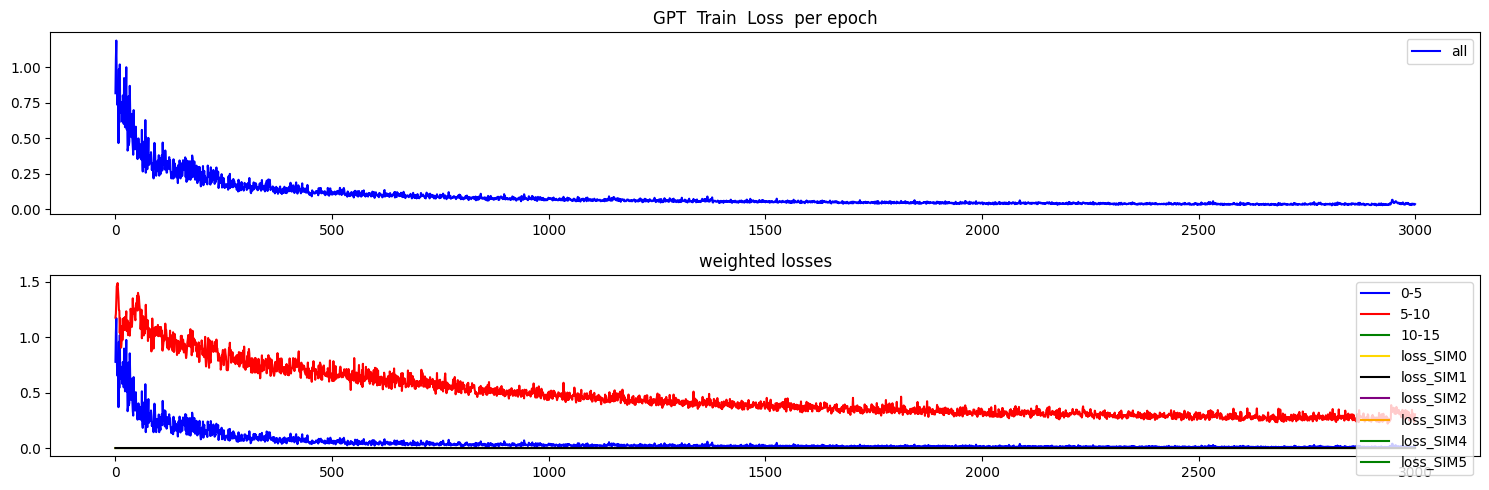

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


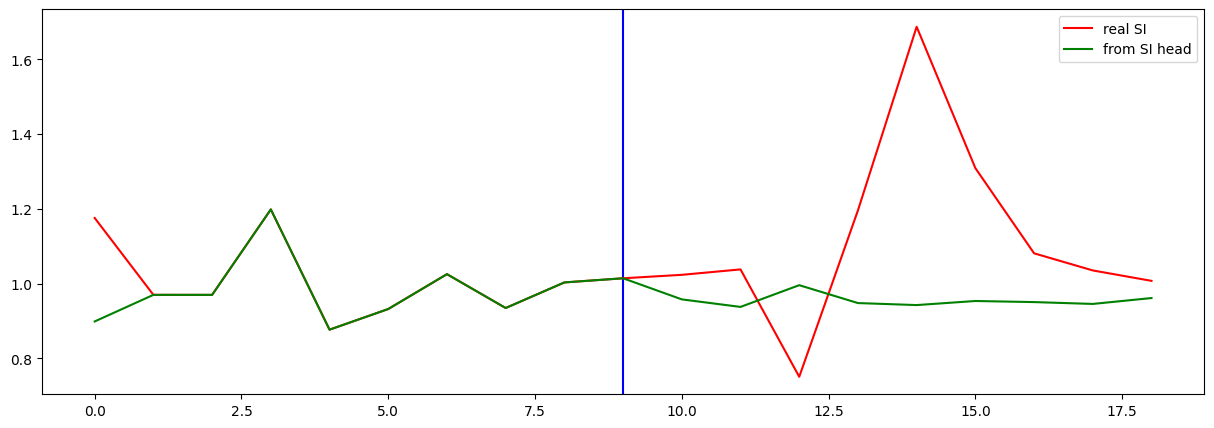

Testing R**2 - (all) - (no inputs):  0.9934098145598405
Testing R**2 - (f2) - SI full (no inputs):  -0.5357701195044833
Testing R**2 - SI head only (no inputs):  -0.5871570376732187
0 ...index R**2 (no inputs):  -0.21368884706082292
1 ...index R**2 (no inputs):  -0.31948050971776953
2 ...index R**2 (no inputs):  -0.5357701195044833
3 ...index R**2 (no inputs):  -1.5154977041497038
4 ...index R**2 (no inputs):  -1.2241828132008372
5 ...index R**2 (no inputs):  -0.11592847599320755
6 ...index R**2 (no inputs):  -178.75016906851621
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09293276423545227
10 ...index R**2 (no inputs):  0.0708417742926939
11 ...index R**2 (no inputs):  -18.304675270686676
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5553486868117732
16 ...index R**2 (no inputs):  -3.738740196002193
17 ...index R**2 (no inputs):  -111.813

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.357986
Loss_SI: 0.26271429657936096 Loss_all: 1.2154326438903809
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.089033
Loss_SI: 0.04733908548951149 Loss_all: 0.4642806947231293
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.056785
Loss_SI: 0.024045493453741074 Loss_all: 0.3514382839202881
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.068087
Loss_SI: 0.030633406713604927 Loss_all: 0.4051736891269684
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.048060
Loss_SI: 0.017763251438736916 Loss_all: 0.32072579860687256
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.047713
Loss_SI: 0.0157227274030447 Loss_all: 0.33562228083610535
Prediction shape: torch.Size([32, 35])
===


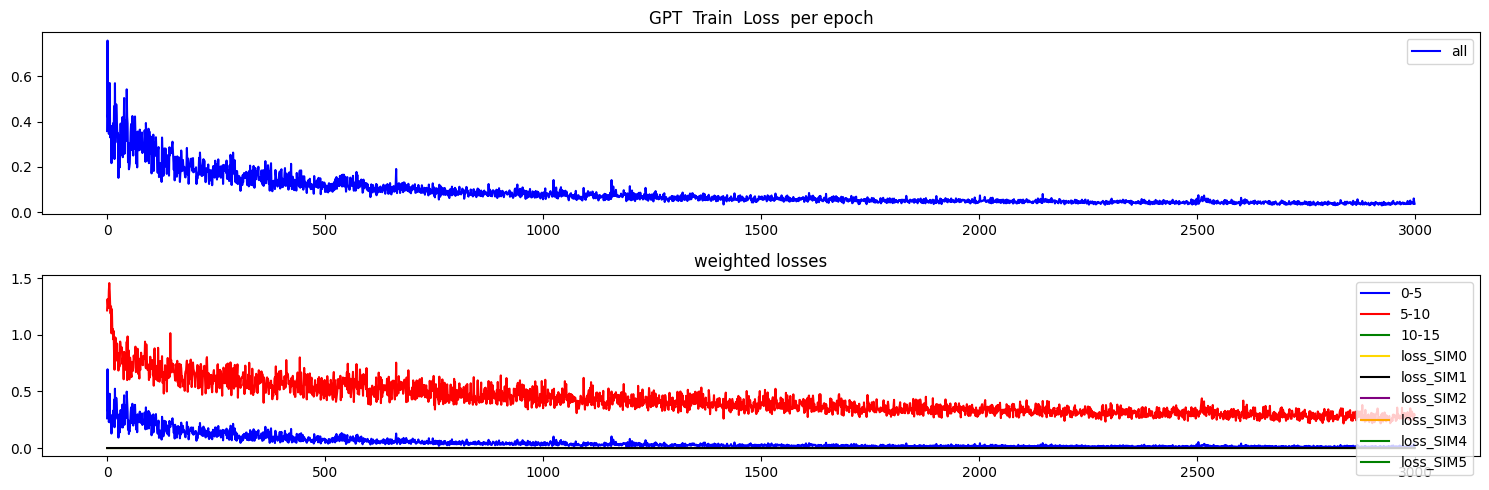

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


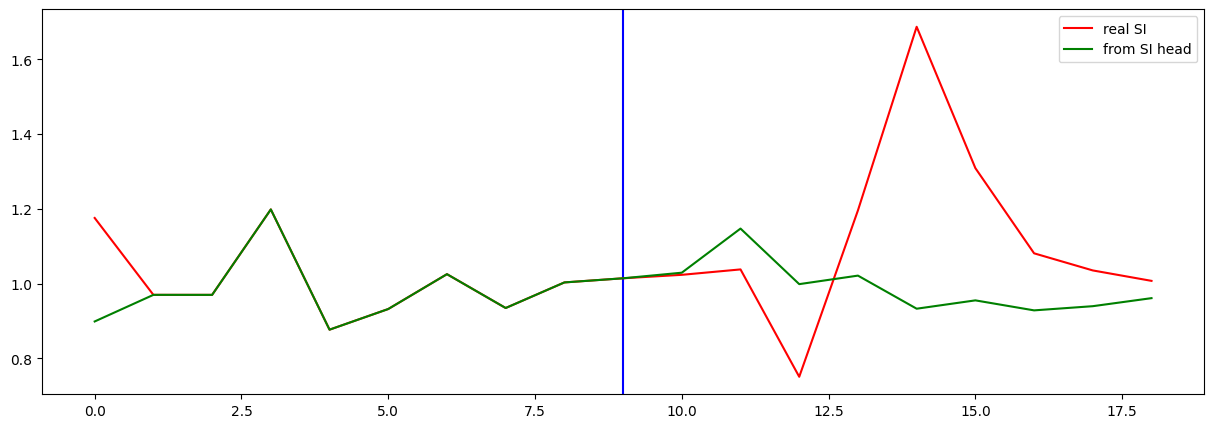

Testing R**2 - (all) - (no inputs):  0.9929834777299045
Testing R**2 - (f2) - SI full (no inputs):  -0.7621345956799894
Testing R**2 - SI head only (no inputs):  -0.631968651406646
0 ...index R**2 (no inputs):  -0.31950510737845894
1 ...index R**2 (no inputs):  -0.37981045161474536
2 ...index R**2 (no inputs):  -0.7621345956799894
3 ...index R**2 (no inputs):  -0.33547144006032315
4 ...index R**2 (no inputs):  -0.11556835618801431
5 ...index R**2 (no inputs):  -0.1903179170998779
6 ...index R**2 (no inputs):  -188.38542730771232
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.298372057205341
10 ...index R**2 (no inputs):  -0.6607789780899693
11 ...index R**2 (no inputs):  -24.436063355744828
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9262903105860967
16 ...index R**2 (no inputs):  0.23687138180919365
17 ...index R**2 (no inputs):  -41.2200

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.193905
Loss_SI: 1.206018090248108 Loss_all: 1.0848904848098755
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.320721
Loss_SI: 0.2776592969894409 Loss_all: 0.7082775235176086
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.179773
Loss_SI: 0.142534539103508 Loss_all: 0.5149215459823608
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.115238
Loss_SI: 0.0716819167137146 Loss_all: 0.5072414875030518
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.092375
Loss_SI: 0.04944677650928497 Loss_all: 0.4787299931049347
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.096964
Loss_SI: 0.06028716266155243 Loss_all: 0.42705923318862915
Prediction shape: torch.Size([32, 35])
===


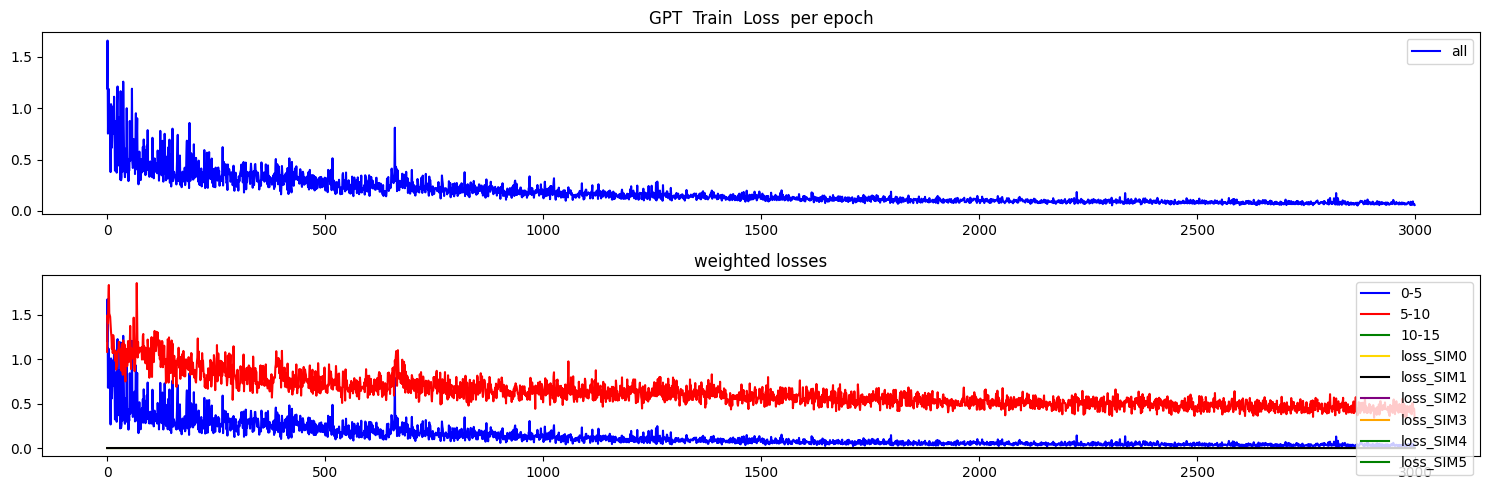

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


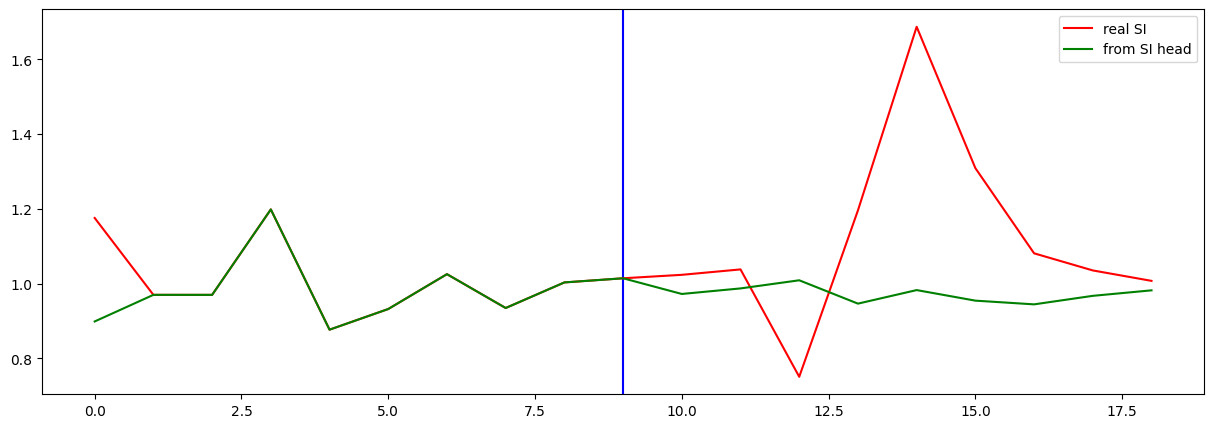

Testing R**2 - (all) - (no inputs):  0.9875177332265046
Testing R**2 - (f2) - SI full (no inputs):  -0.3660157988651136
Testing R**2 - SI head only (no inputs):  -0.5461539174789085
0 ...index R**2 (no inputs):  -0.0928647386451964
1 ...index R**2 (no inputs):  -0.24473054145161544
2 ...index R**2 (no inputs):  -0.3660157988651136
3 ...index R**2 (no inputs):  -1.0621641865635092
4 ...index R**2 (no inputs):  -4.18503723751173
5 ...index R**2 (no inputs):  -1.1097562531844969
6 ...index R**2 (no inputs):  -137.67155359111308
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.018372148173116387
10 ...index R**2 (no inputs):  -1.4630722571344918
11 ...index R**2 (no inputs):  -7.1995282016624245
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7486680845589622
16 ...index R**2 (no inputs):  -0.6264990666412542
17 ...index R**2 (no inputs):  -764.29164

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.786936
Loss_SI: 0.7427399754524231 Loss_all: 1.1846991777420044
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.338750
Loss_SI: 0.3085542321205139 Loss_all: 0.610512375831604
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.253164
Loss_SI: 0.20233973860740662 Loss_all: 0.7105834484100342
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.137232
Loss_SI: 0.09285895526409149 Loss_all: 0.5365884900093079
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.104011
Loss_SI: 0.05530724674463272 Loss_all: 0.5423434972763062
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.162895
Loss_SI: 0.11405450105667114 Loss_all: 0.6024605631828308
Prediction shape: torch.Size([32, 35])
===


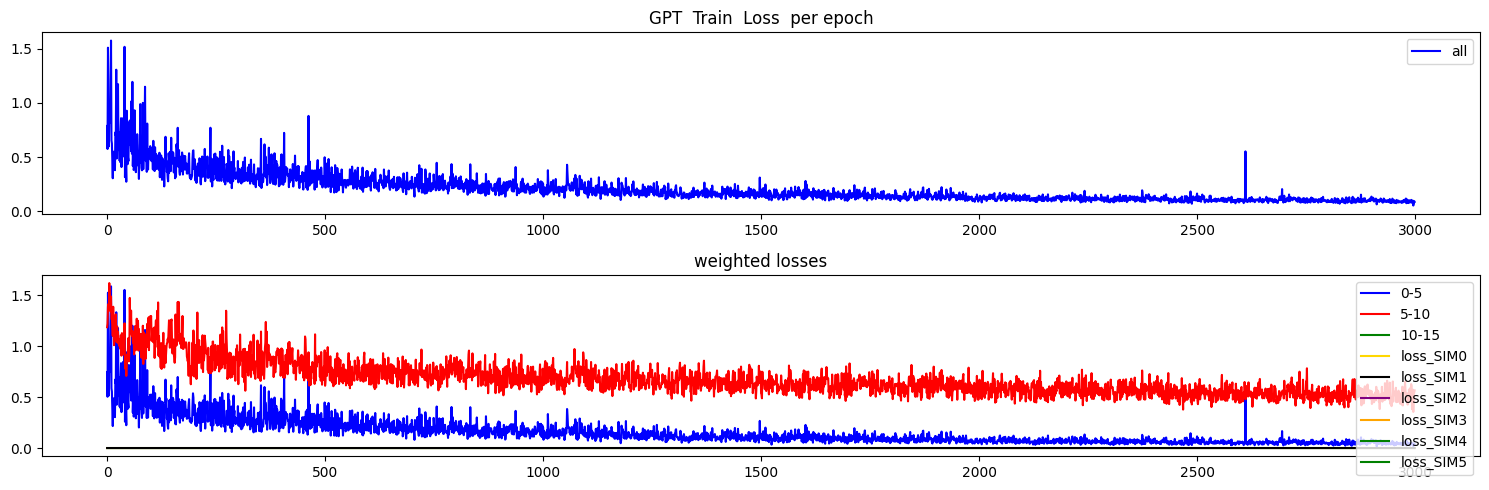

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


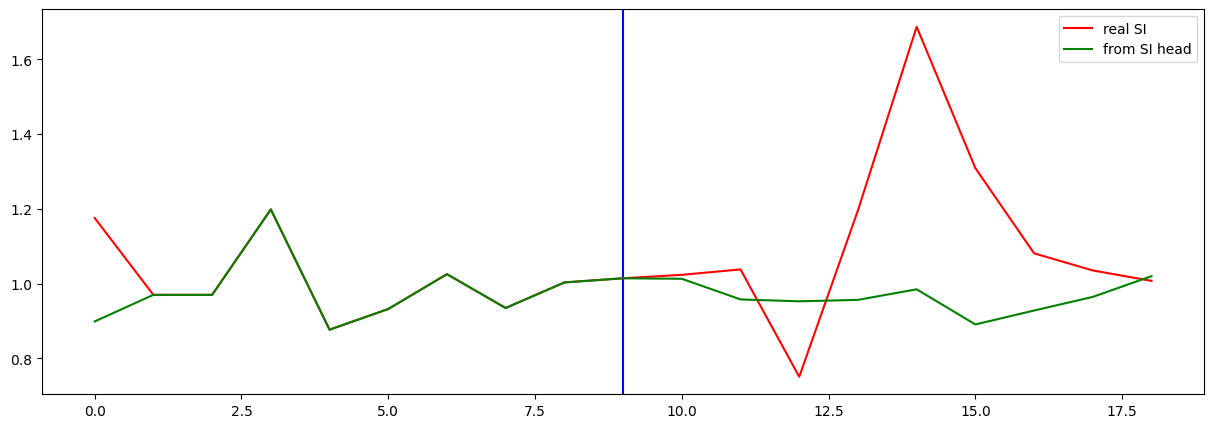

Testing R**2 - (all) - (no inputs):  0.9919040668997537
Testing R**2 - (f2) - SI full (no inputs):  -0.4406722822940967
Testing R**2 - SI head only (no inputs):  -0.5495282172145799
0 ...index R**2 (no inputs):  -0.034214885670345474
1 ...index R**2 (no inputs):  -0.2863684799658244
2 ...index R**2 (no inputs):  -0.4406722822940967
3 ...index R**2 (no inputs):  -0.11330822271540564
4 ...index R**2 (no inputs):  -9.227191075966473
5 ...index R**2 (no inputs):  -0.3711133574925207
6 ...index R**2 (no inputs):  -59.665901184149384
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2777947101683258
10 ...index R**2 (no inputs):  -1.0563516345573012
11 ...index R**2 (no inputs):  -7.012427152785319
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.9777329970679256
16 ...index R**2 (no inputs):  -0.6753162846253704
17 ...index R**2 (no inputs):  -143.1982

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.500876
Loss_SI: 0.42334961891174316 Loss_all: 1.1986092329025269
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.114157
Loss_SI: 0.04796589910984039 Loss_all: 0.7098754048347473
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.074180
Loss_SI: 0.022743400186300278 Loss_all: 0.537110447883606
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.049505
Loss_SI: 0.007029342465102673 Loss_all: 0.4317875802516937
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.043151
Loss_SI: 0.009241798892617226 Loss_all: 0.3483341634273529
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.047250
Loss_SI: 0.008820511400699615 Loss_all: 0.39311501383781433
Prediction shape: torch.Size([32, 35])
===


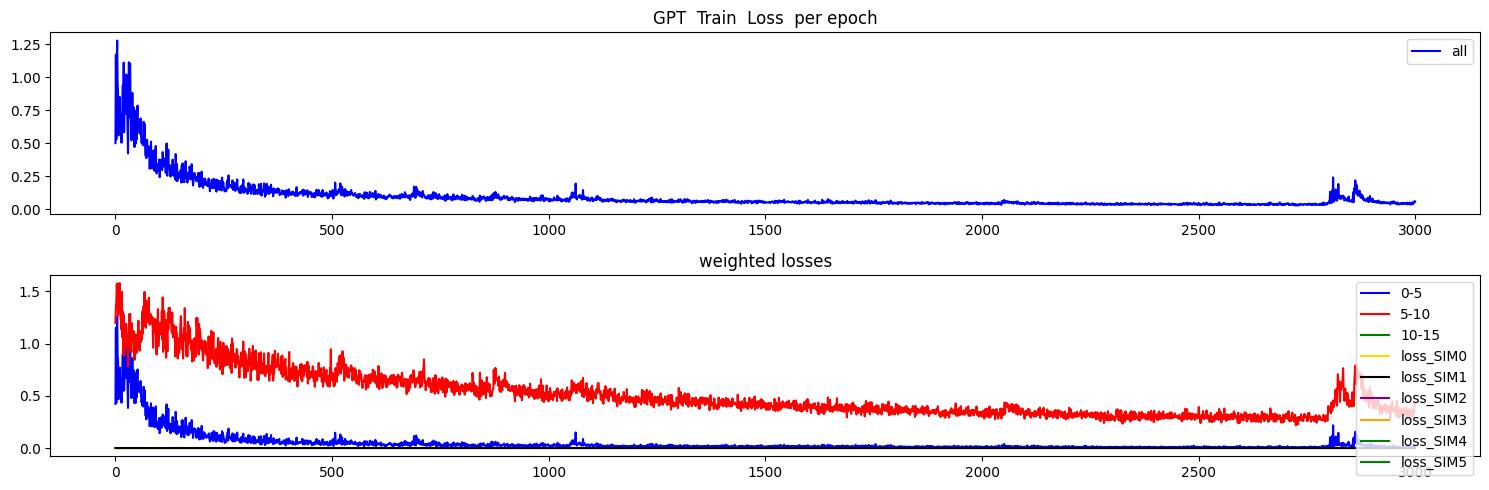

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


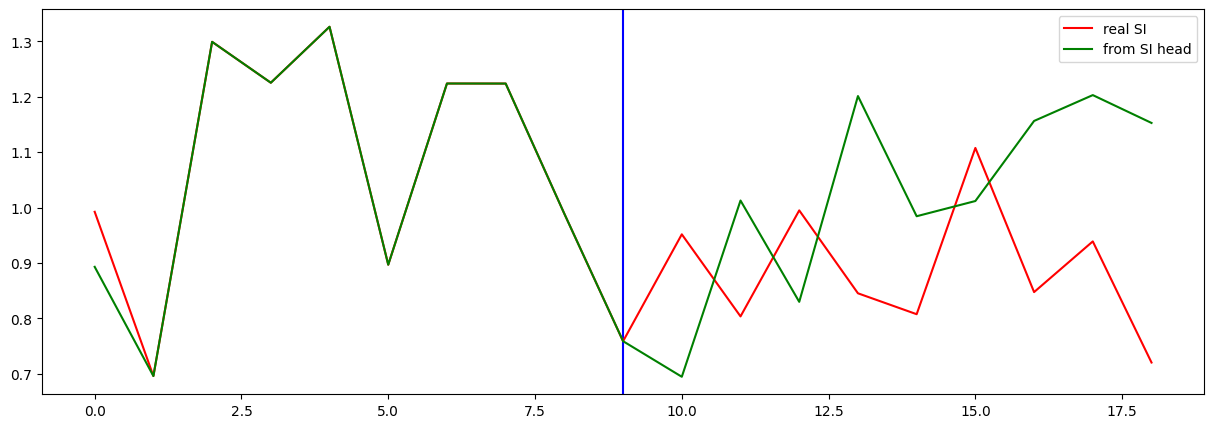

Testing R**2 - (all) - (no inputs):  0.9816302036058568
Testing R**2 - (f2) - SI full (no inputs):  -2.984979003688846
Testing R**2 - SI head only (no inputs):  -3.37506936575181
0 ...index R**2 (no inputs):  -0.27612904974078134
1 ...index R**2 (no inputs):  -1.4030790218431228
2 ...index R**2 (no inputs):  -2.984979003688846
3 ...index R**2 (no inputs):  -35.20846137931481
4 ...index R**2 (no inputs):  -70.79162340611387
5 ...index R**2 (no inputs):  -92.33911678559704
6 ...index R**2 (no inputs):  -1350.4575248599626
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.09758693578565
10 ...index R**2 (no inputs):  -0.1421428369716755
11 ...index R**2 (no inputs):  -41.1543541678438
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.0251269773852267
16 ...index R**2 (no inputs):  -0.2315423456907253
17 ...index R**2 (no inputs):  -53.54071850027242
1

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.611028
Loss_SI: 0.5710270404815674 Loss_all: 0.9710388779640198
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.191497
Loss_SI: 0.10482300072908401 Loss_all: 0.9715631604194641
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.108335
Loss_SI: 0.04332077503204346 Loss_all: 0.6934641003608704
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.085672
Loss_SI: 0.02684413641691208 Loss_all: 0.6151247620582581
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.067438
Loss_SI: 0.019416578114032745 Loss_all: 0.49962955713272095
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.056460
Loss_SI: 0.013765212148427963 Loss_all: 0.44071629643440247
Prediction shape: torch.Size([32, 35])
===


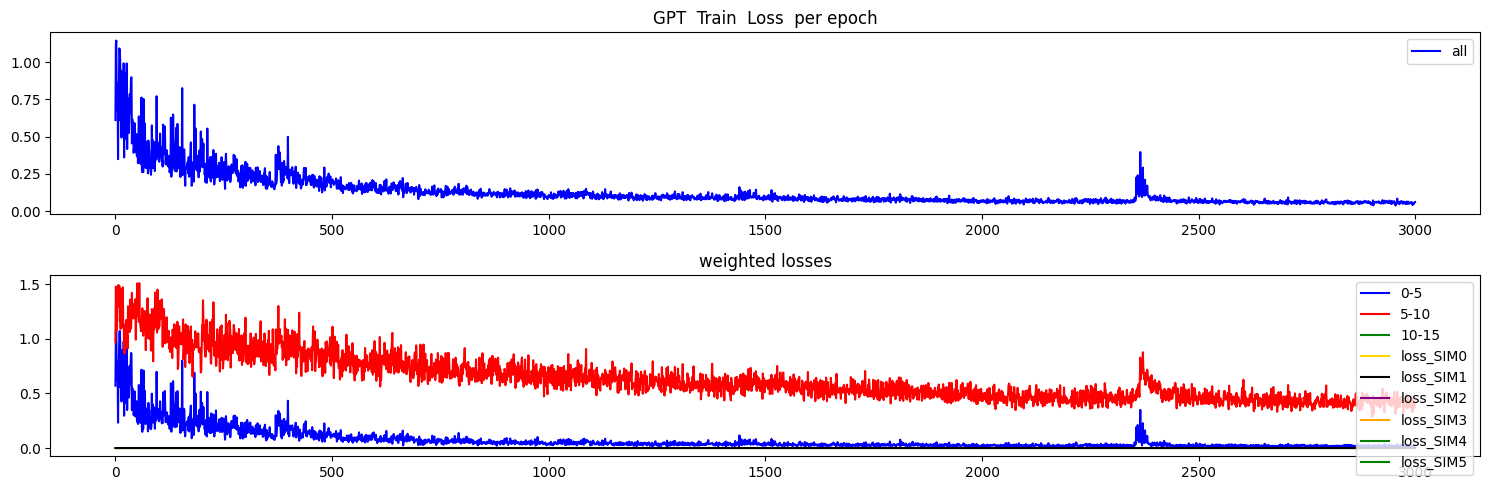

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


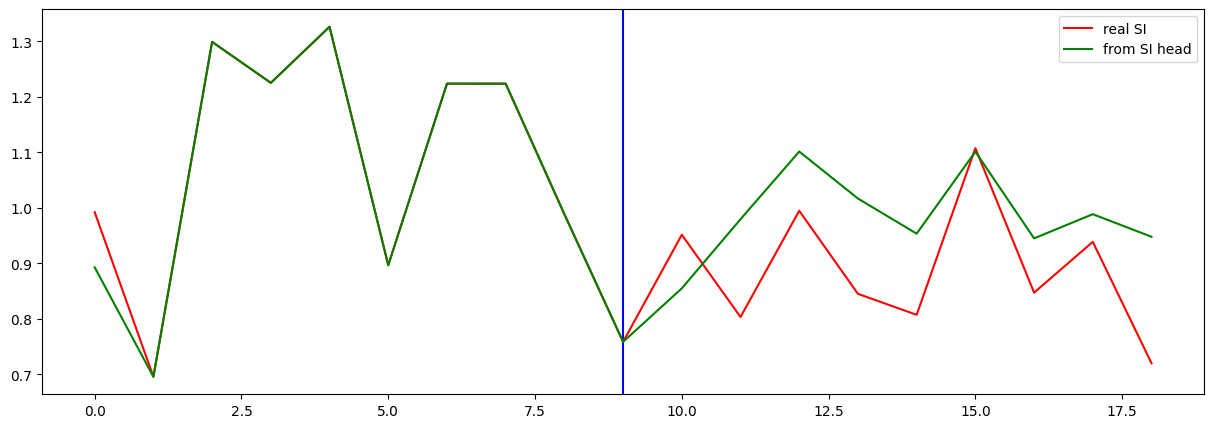

Testing R**2 - (all) - (no inputs):  0.9589915246308534
Testing R**2 - (f2) - SI full (no inputs):  0.043698037828728165
Testing R**2 - SI head only (no inputs):  -1.3307387940015247
0 ...index R**2 (no inputs):  -1.103018449226953
1 ...index R**2 (no inputs):  -1.3323483879579001
2 ...index R**2 (no inputs):  0.043698037828728165
3 ...index R**2 (no inputs):  -4.282914107355823
4 ...index R**2 (no inputs):  -4.266356312749742
5 ...index R**2 (no inputs):  -207.72629889441944
6 ...index R**2 (no inputs):  -1436.4596633274862
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2802692163381528
10 ...index R**2 (no inputs):  -0.24554466512873452
11 ...index R**2 (no inputs):  -486.59569033063093
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.584114645570345
16 ...index R**2 (no inputs):  -0.04938973988235995
17 ...index R**2 (no inputs):  -530.28489

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.511696
Loss_SI: 0.43339604139328003 Loss_all: 1.216394305229187
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.257853
Loss_SI: 0.19762764871120453 Loss_all: 0.7998781204223633
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.155946
Loss_SI: 0.10833597928285599 Loss_all: 0.5844388008117676
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.122324
Loss_SI: 0.07395453751087189 Loss_all: 0.5576532483100891
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.087413
Loss_SI: 0.037476640194654465 Loss_all: 0.5368443727493286
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.065177
Loss_SI: 0.023414259776473045 Loss_all: 0.44104239344596863
Prediction shape: torch.Size([32, 35])
===


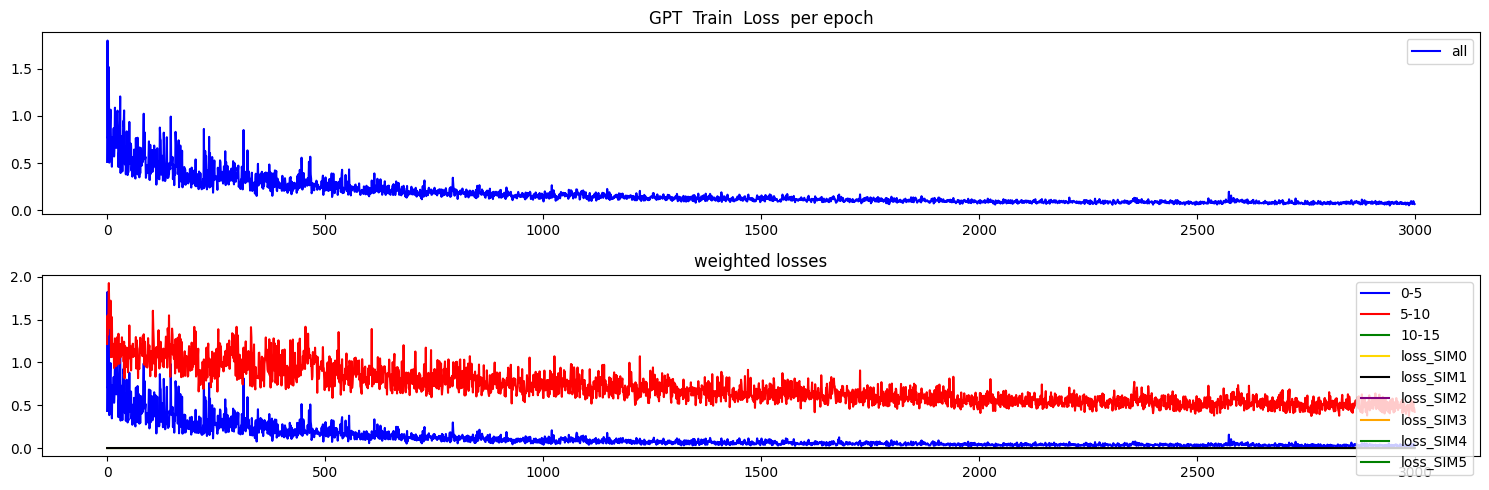

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


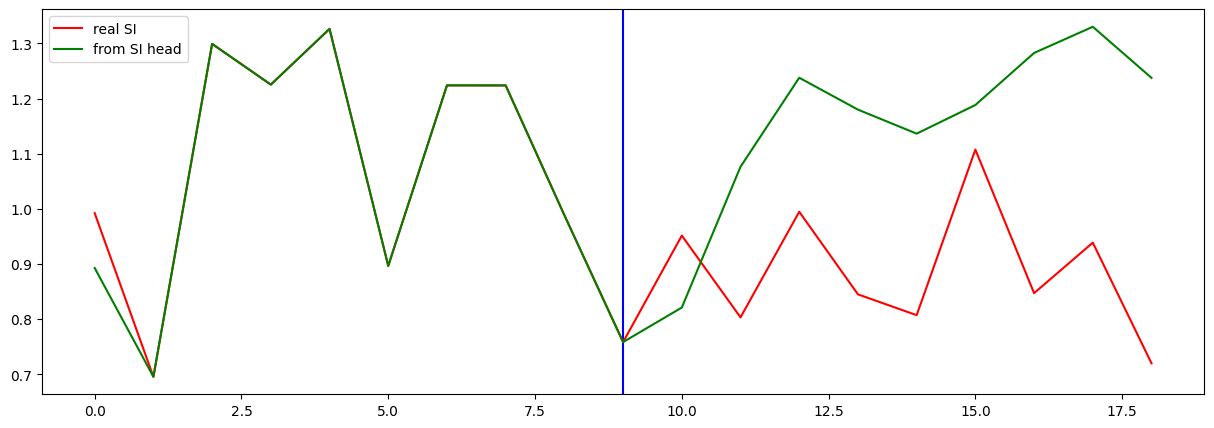

Testing R**2 - (all) - (no inputs):  0.9633253160894208
Testing R**2 - (f2) - SI full (no inputs):  -5.738228559875477
Testing R**2 - SI head only (no inputs):  -7.203913116822781
0 ...index R**2 (no inputs):  -0.21349852008765757
1 ...index R**2 (no inputs):  -7.5235565525955685
2 ...index R**2 (no inputs):  -5.738228559875477
3 ...index R**2 (no inputs):  -4.570050425950217
4 ...index R**2 (no inputs):  -2389.5103488394325
5 ...index R**2 (no inputs):  -185.33494087977255
6 ...index R**2 (no inputs):  -92.62863854769098
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.143556604589393
10 ...index R**2 (no inputs):  -0.1894019823515405
11 ...index R**2 (no inputs):  -316.10893083288096
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -19.270138378895425
16 ...index R**2 (no inputs):  0.001069019647231828
17 ...index R**2 (no inputs):  -305.331317308

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.453645
Loss_SI: 1.4841055870056152 Loss_all: 1.179499626159668
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.124704
Loss_SI: 0.0627862811088562 Loss_all: 0.6819666624069214
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.187984
Loss_SI: 0.1475960612297058 Loss_all: 0.5514797568321228
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.138554
Loss_SI: 0.09483792632818222 Loss_all: 0.5320001244544983
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.116083
Loss_SI: 0.0647718757390976 Loss_all: 0.5778857469558716
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.121165
Loss_SI: 0.06487386673688889 Loss_all: 0.6277896761894226
Prediction shape: torch.Size([32, 35])
===


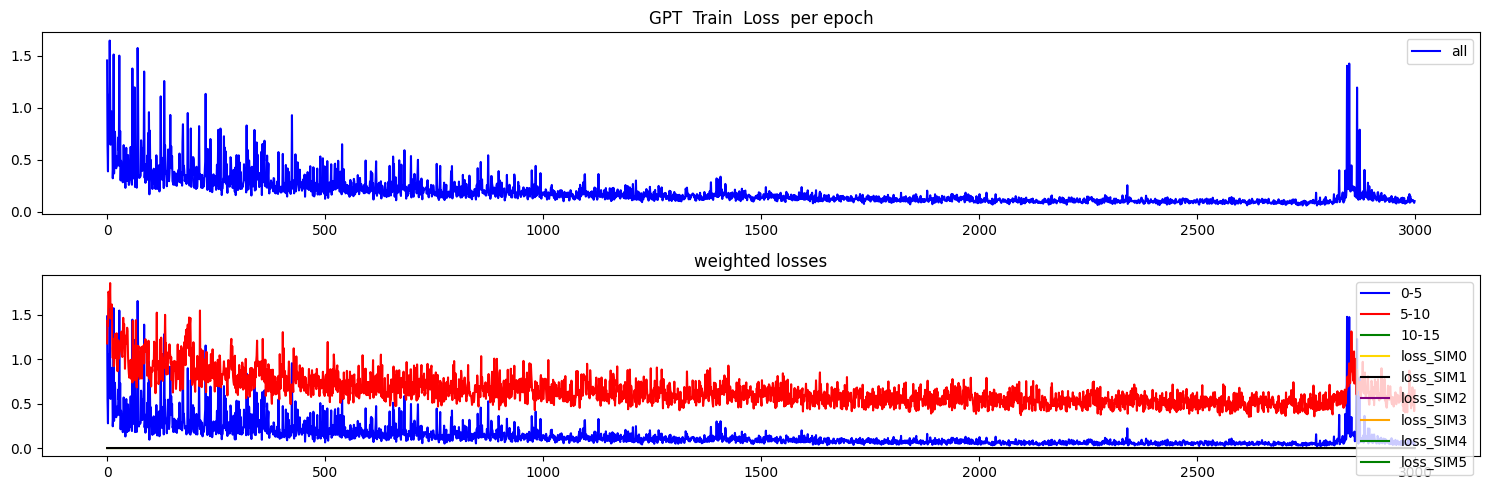

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


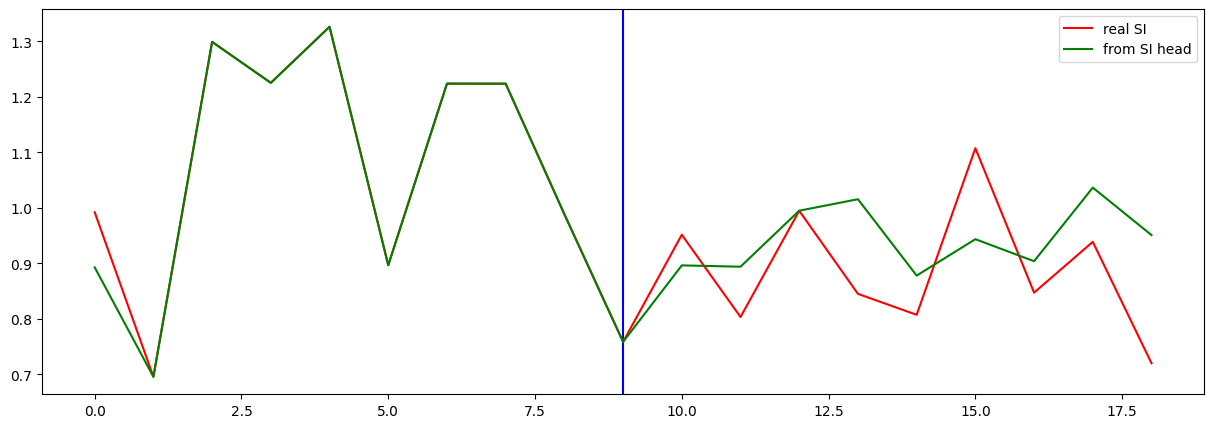

Testing R**2 - (all) - (no inputs):  0.9711671941386534
Testing R**2 - (f2) - SI full (no inputs):  -1.014212756756577
Testing R**2 - SI head only (no inputs):  -1.1166740225367873
0 ...index R**2 (no inputs):  -0.38383128742148376
1 ...index R**2 (no inputs):  -0.27697519507793444
2 ...index R**2 (no inputs):  -1.014212756756577
3 ...index R**2 (no inputs):  -17.377954876903882
4 ...index R**2 (no inputs):  -236.57278578214232
5 ...index R**2 (no inputs):  -145.71521669255512
6 ...index R**2 (no inputs):  -1277.196696596251
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.07878606482347494
10 ...index R**2 (no inputs):  -0.26916541860774346
11 ...index R**2 (no inputs):  -1781.9237032510996
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.41579337205613
16 ...index R**2 (no inputs):  -0.34102758968342806
17 ...index R**2 (no inputs):  -280.386417

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.779217
Loss_SI: 0.7389247417449951 Loss_all: 1.1418488025665283
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.092001
Loss_SI: 0.027372119948267937 Loss_all: 0.6736630797386169
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.072807
Loss_SI: 0.02553532086312771 Loss_all: 0.4982569217681885
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.058556
Loss_SI: 0.016833923757076263 Loss_all: 0.43405455350875854
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.042971
Loss_SI: 0.012698201462626457 Loss_all: 0.3154287338256836
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.035640
Loss_SI: 0.01018497720360756 Loss_all: 0.26473268866539
Prediction shape: torch.Size([32, 35])
===


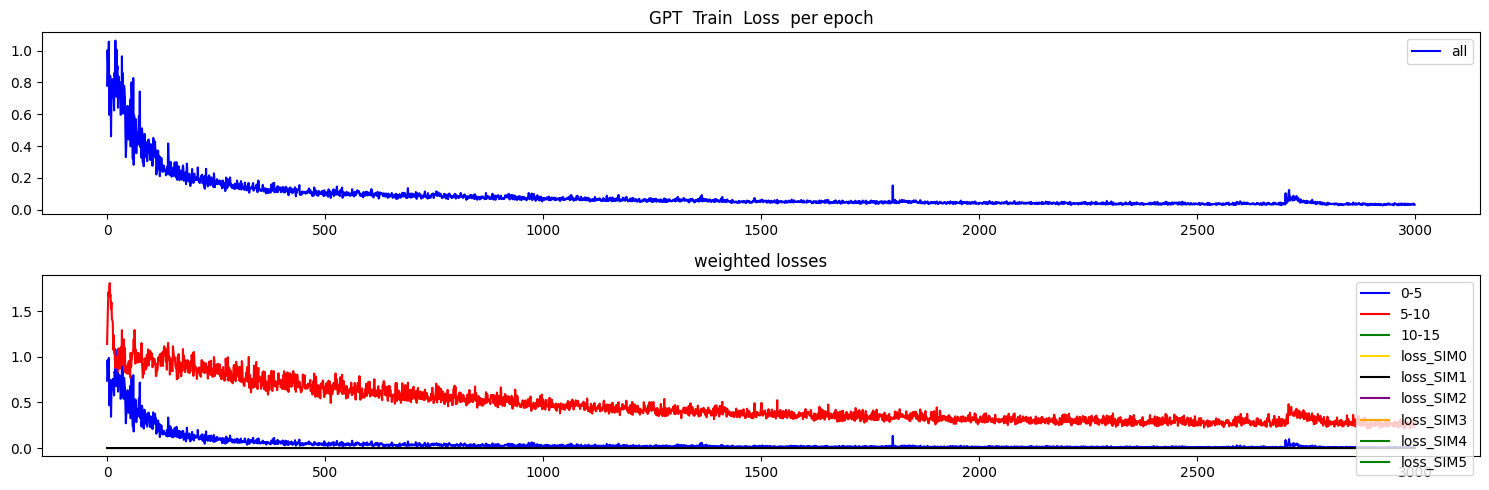

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


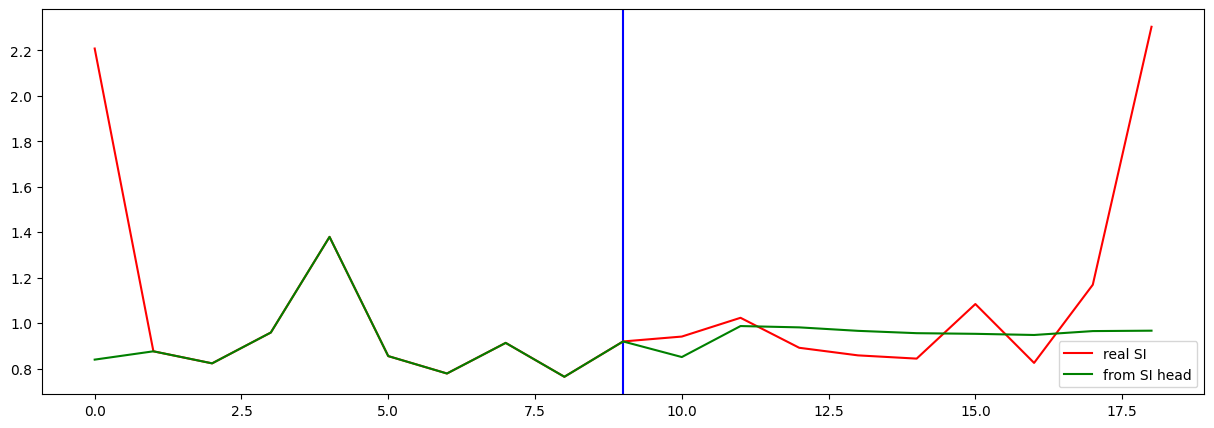

Testing R**2 - (all) - (no inputs):  0.9619947387937796
Testing R**2 - (f2) - SI full (no inputs):  -0.7219365056705653
Testing R**2 - SI head only (no inputs):  -0.2709445132610804
0 ...index R**2 (no inputs):  -0.037320526326994674
1 ...index R**2 (no inputs):  -0.2734434882239063
2 ...index R**2 (no inputs):  -0.7219365056705653
3 ...index R**2 (no inputs):  -0.08421788319791879
4 ...index R**2 (no inputs):  -0.1359973680330231
5 ...index R**2 (no inputs):  -0.48552919384049886
6 ...index R**2 (no inputs):  -0.21085349715867752
7 ...index R**2 (no inputs):  -0.24816199687459206
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.3003933812921868
10 ...index R**2 (no inputs):  -4.332752970879319
11 ...index R**2 (no inputs):  -10.752307413837514
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5271552840078657
16 ...index R**2 (no inputs):  -1.327974613585651
17 ...index R**2 (no 

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.781861
Loss_SI: 0.7303521037101746 Loss_all: 1.2454423904418945
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.198243
Loss_SI: 0.12395115196704865 Loss_all: 0.8668702840805054
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.108890
Loss_SI: 0.04801196977496147 Loss_all: 0.6567891240119934
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.110142
Loss_SI: 0.05036311596632004 Loss_all: 0.6481482982635498
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.069782
Loss_SI: 0.015938840806484222 Loss_all: 0.5543753504753113
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.058763
Loss_SI: 0.01985110342502594 Loss_all: 0.4089721739292145
Prediction shape: torch.Size([32, 35])
===


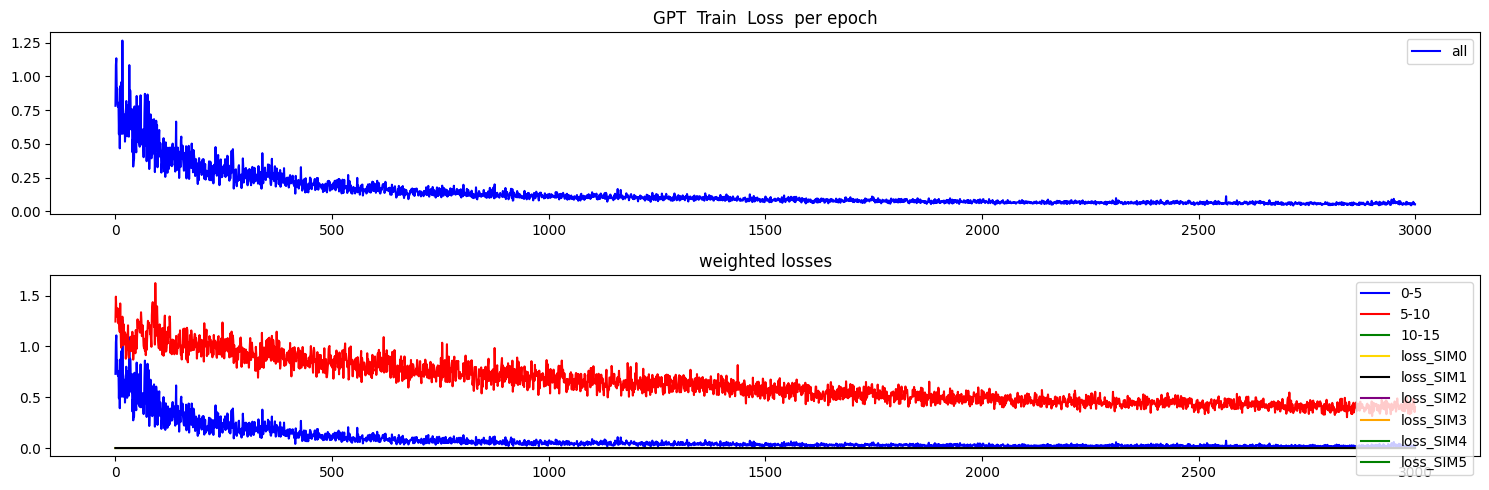

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


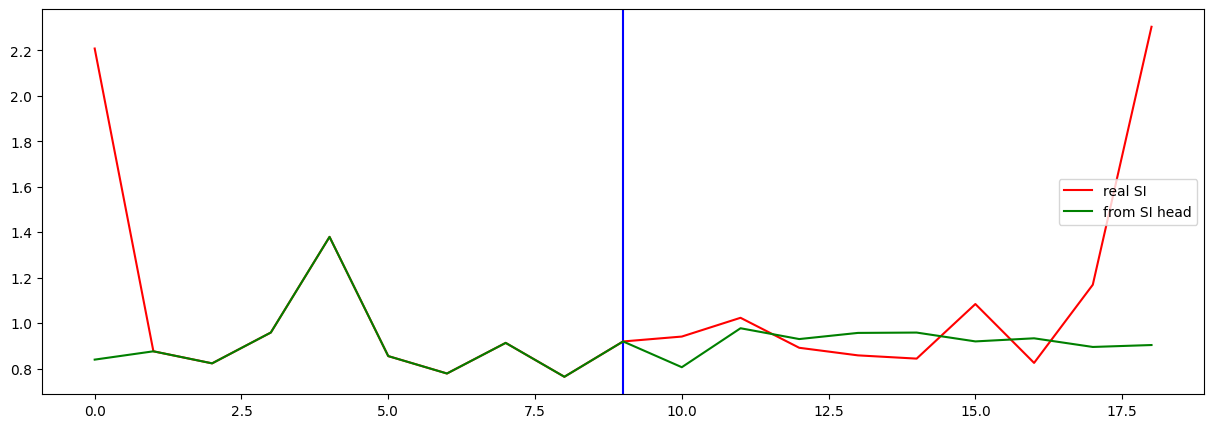

Testing R**2 - (all) - (no inputs):  0.9311194415228247
Testing R**2 - (f2) - SI full (no inputs):  -0.5149152755193549
Testing R**2 - SI head only (no inputs):  -0.4003118281841944
0 ...index R**2 (no inputs):  -0.28341901724880114
1 ...index R**2 (no inputs):  -0.8168906090412471
2 ...index R**2 (no inputs):  -0.5149152755193549
3 ...index R**2 (no inputs):  -0.1035220565904944
4 ...index R**2 (no inputs):  -0.08047382687066351
5 ...index R**2 (no inputs):  -1.7073140920097396
6 ...index R**2 (no inputs):  -0.2806640552473869
7 ...index R**2 (no inputs):  -0.9769833294754486
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.1936324412713345
10 ...index R**2 (no inputs):  -2.744563150713891
11 ...index R**2 (no inputs):  -33.200492231854646
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.486164422113485
16 ...index R**2 (no inputs):  -3.966988584332424
17 ...index R**2 (no inputs

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.857160
Loss_SI: 0.7985551357269287 Loss_all: 1.3846065998077393
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.217471
Loss_SI: 0.13949379324913025 Loss_all: 0.9192662835121155
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.127292
Loss_SI: 0.07232572138309479 Loss_all: 0.6219884157180786
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.110304
Loss_SI: 0.04976165294647217 Loss_all: 0.6551899909973145
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.101621
Loss_SI: 0.04783625900745392 Loss_all: 0.5856863856315613
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.083005
Loss_SI: 0.02833741158246994 Loss_all: 0.57501620054245
Prediction shape: torch.Size([32, 35])
===


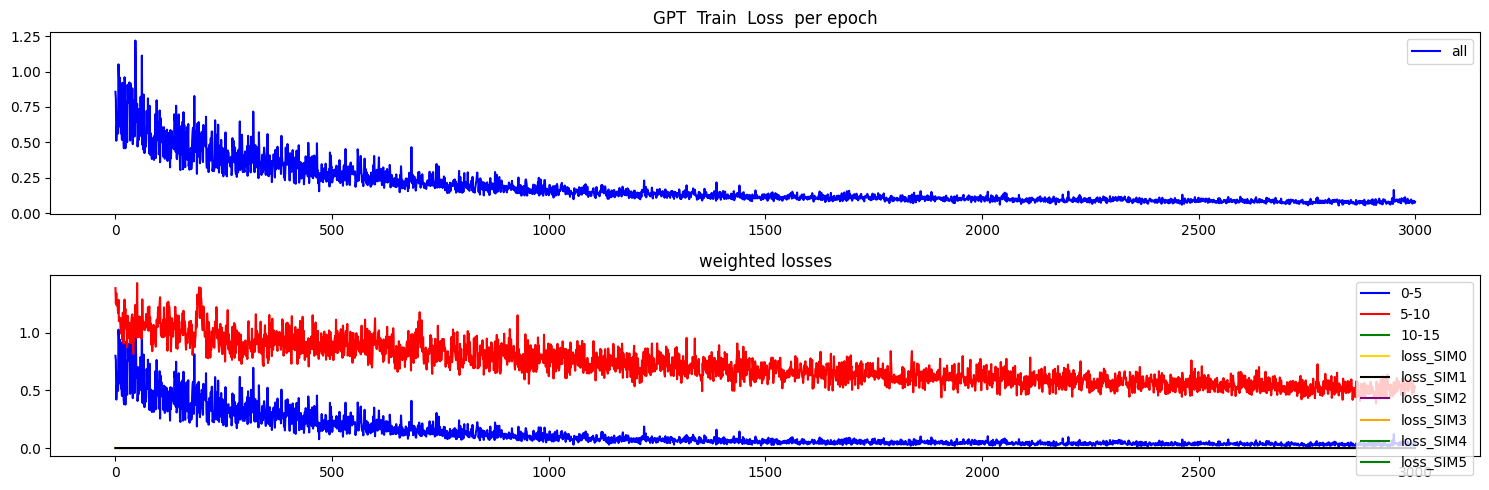

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


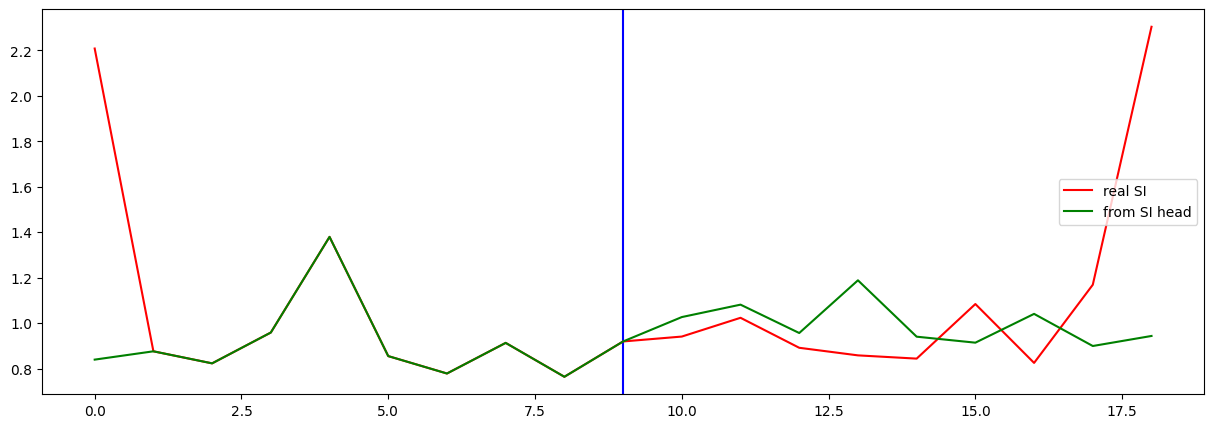

Testing R**2 - (all) - (no inputs):  0.9624708991911317
Testing R**2 - (f2) - SI full (no inputs):  -0.8280773340499221
Testing R**2 - SI head only (no inputs):  -0.3792535659774001
0 ...index R**2 (no inputs):  -0.7183039836313048
1 ...index R**2 (no inputs):  -0.4542998439057637
2 ...index R**2 (no inputs):  -0.8280773340499221
3 ...index R**2 (no inputs):  0.2503624778655278
4 ...index R**2 (no inputs):  -0.11856325458651717
5 ...index R**2 (no inputs):  -0.46905415371183357
6 ...index R**2 (no inputs):  0.11069691879213917
7 ...index R**2 (no inputs):  -31.875297834717415
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.48865256555653835
10 ...index R**2 (no inputs):  -0.5142005573820043
11 ...index R**2 (no inputs):  -498.3498405274481
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.121524365037711
16 ...index R**2 (no inputs):  -3.4088242631794268
17 ...index R**2 (no inpu

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.935802
Loss_SI: 0.8866224884986877 Loss_all: 1.3784189224243164
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.232348
Loss_SI: 0.16218501329421997 Loss_all: 0.8638132810592651
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.217388
Loss_SI: 0.1494586169719696 Loss_all: 0.8287515640258789
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.144663
Loss_SI: 0.07880907505750656 Loss_all: 0.7373508214950562
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.106312
Loss_SI: 0.04514949768781662 Loss_all: 0.6567786335945129
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.078560
Loss_SI: 0.02340630255639553 Loss_all: 0.5749481320381165
Prediction shape: torch.Size([32, 35])
===


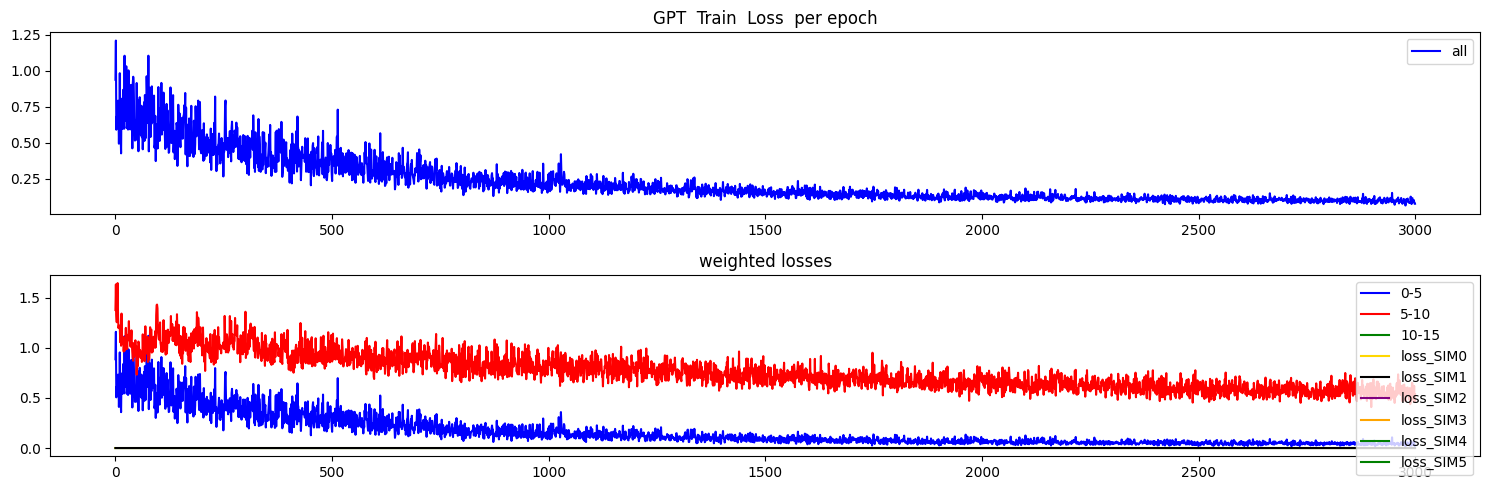

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


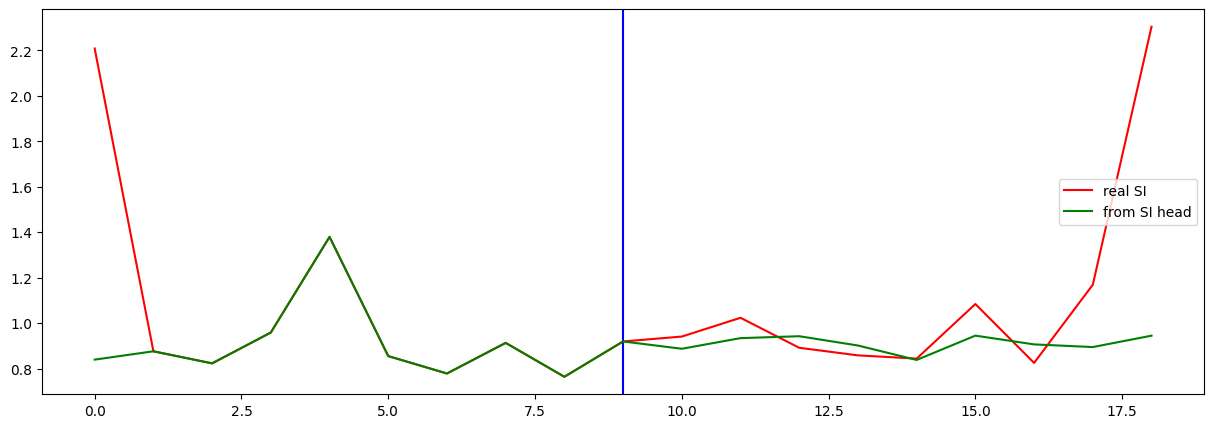

Testing R**2 - (all) - (no inputs):  0.9667912101621351
Testing R**2 - (f2) - SI full (no inputs):  -0.5671245524622262
Testing R**2 - SI head only (no inputs):  -0.3701704403055137
0 ...index R**2 (no inputs):  -0.22658292415442682
1 ...index R**2 (no inputs):  -0.5575712627756639
2 ...index R**2 (no inputs):  -0.5671245524622262
3 ...index R**2 (no inputs):  0.19587609318234012
4 ...index R**2 (no inputs):  -0.16546082573140453
5 ...index R**2 (no inputs):  -0.2706167410681506
6 ...index R**2 (no inputs):  0.248492886550295
7 ...index R**2 (no inputs):  -0.4385346865149031
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.20945409802504855
10 ...index R**2 (no inputs):  0.3024256607529887
11 ...index R**2 (no inputs):  -328.11463839805833
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.7914045154354703
16 ...index R**2 (no inputs):  -2.4546187448719445
17 ...index R**2 (no inpu

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.978314
Loss_SI: 0.9292947053909302 Loss_all: 1.4194899797439575
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.112275
Loss_SI: 0.05606847256422043 Loss_all: 0.6181331276893616
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.054495
Loss_SI: 0.012448539957404137 Loss_all: 0.432912677526474
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.037835
Loss_SI: 0.015224767848849297 Loss_all: 0.2413286417722702
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.037942
Loss_SI: 0.008445670828223228 Loss_all: 0.3034071624279022
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.030095
Loss_SI: 0.004040353465825319 Loss_all: 0.26459142565727234
Prediction shape: torch.Size([32, 35])
===


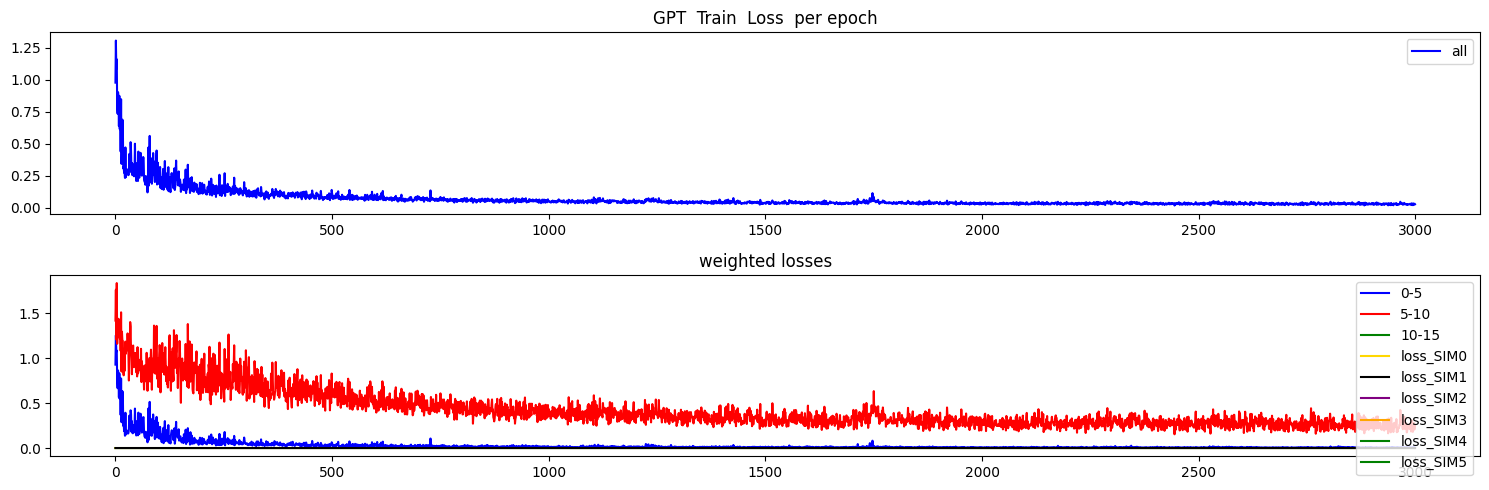

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


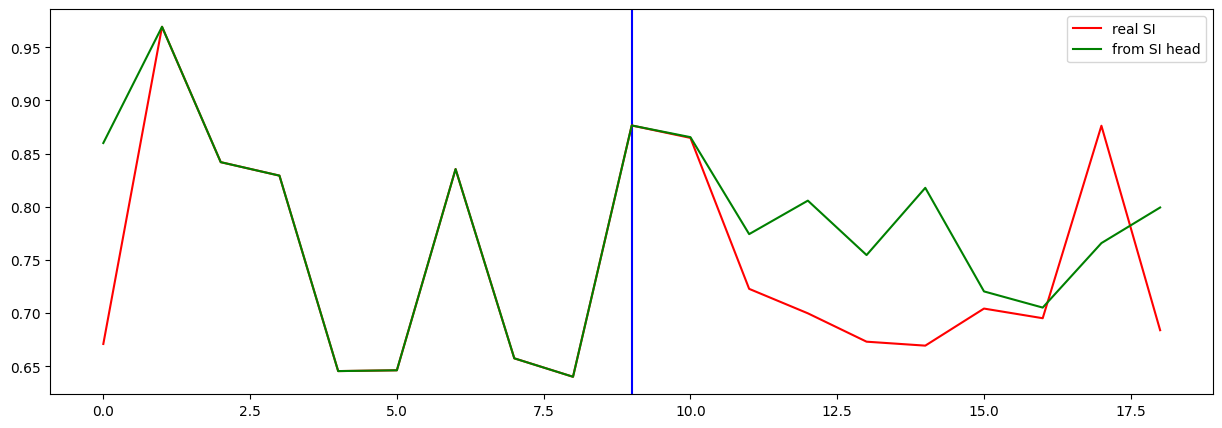

Testing R**2 - (all) - (no inputs):  0.9987140640840203
Testing R**2 - (f2) - SI full (no inputs):  -3.9947413995167462
Testing R**2 - SI head only (no inputs):  -2.499407172989789
0 ...index R**2 (no inputs):  -0.7149701746722954
1 ...index R**2 (no inputs):  -0.9577196449262264
2 ...index R**2 (no inputs):  -3.9947413995167462
3 ...index R**2 (no inputs):  -2.9102145440909393
4 ...index R**2 (no inputs):  -1.05186380898955
5 ...index R**2 (no inputs):  -1.5699685654667181
6 ...index R**2 (no inputs):  -9.085294242086032
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.026856443372645145
10 ...index R**2 (no inputs):  -0.0597134382140847
11 ...index R**2 (no inputs):  -1.2499044210402954
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7.456925644108367
16 ...index R**2 (no inputs):  -1.0065284332178557
17 ...index R**2 (no inputs):  -1.35962163147

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.435919
Loss_SI: 0.3668484687805176 Loss_all: 1.0575580596923828
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.121672
Loss_SI: 0.07630085200071335 Loss_all: 0.5300084352493286
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.073919
Loss_SI: 0.025878597050905228 Loss_all: 0.5062859058380127
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.072814
Loss_SI: 0.0378052219748497 Loss_all: 0.3878893554210663
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.069371
Loss_SI: 0.029041413217782974 Loss_all: 0.43233272433280945
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.041744
Loss_SI: 0.016315246000885963 Loss_all: 0.27060651779174805
Prediction shape: torch.Size([32, 35])
===


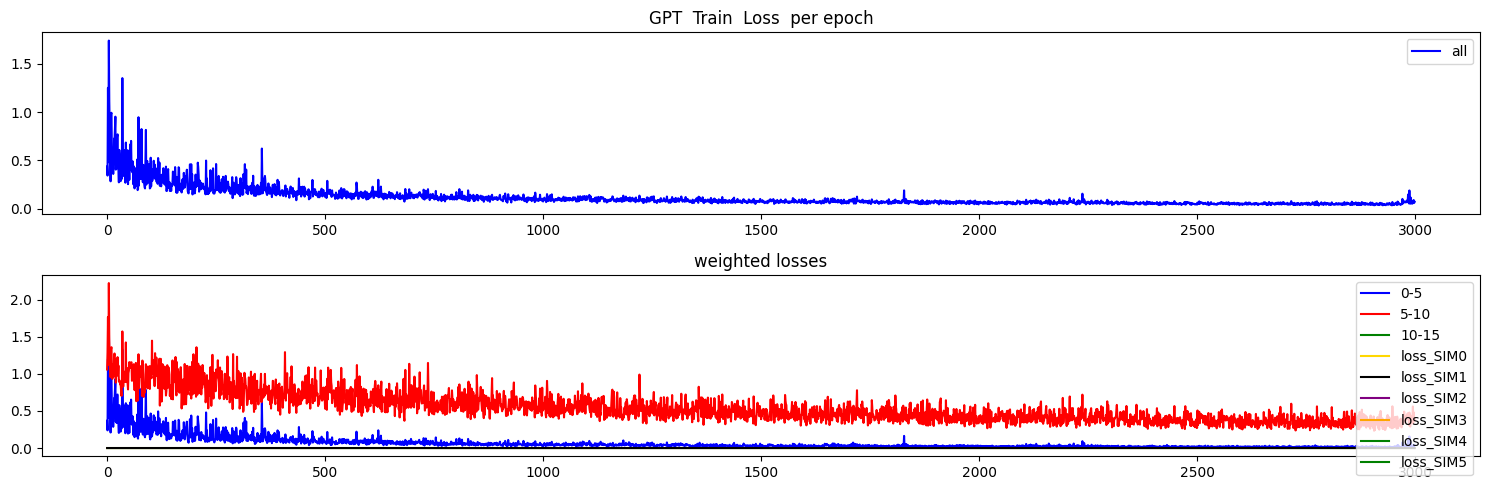

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


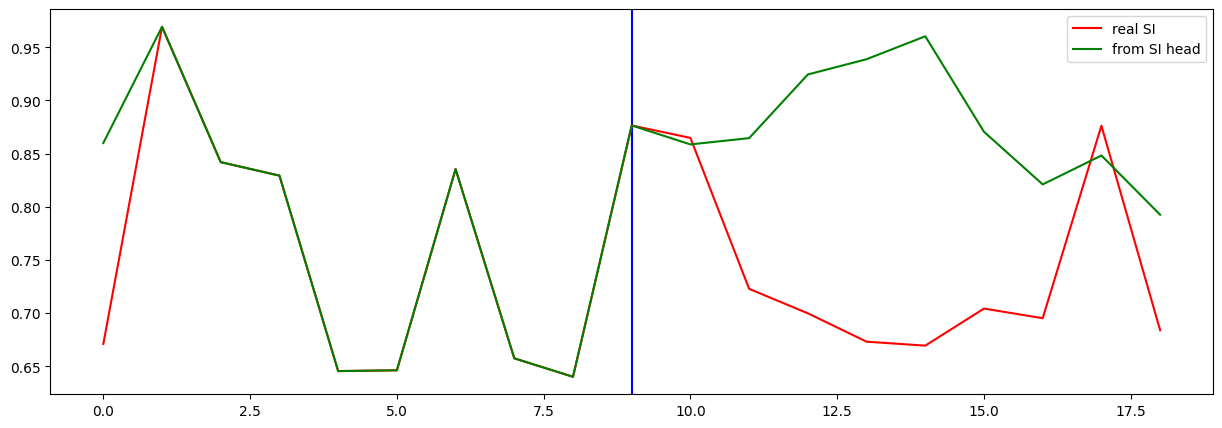

Testing R**2 - (all) - (no inputs):  0.9989429012510368
Testing R**2 - (f2) - SI full (no inputs):  -0.8564060781652498
Testing R**2 - SI head only (no inputs):  -8.667917242303607
0 ...index R**2 (no inputs):  -0.6410138842588284
1 ...index R**2 (no inputs):  -0.9700252265317844
2 ...index R**2 (no inputs):  -0.8564060781652498
3 ...index R**2 (no inputs):  -22.282994870938733
4 ...index R**2 (no inputs):  -2.025320220232046
5 ...index R**2 (no inputs):  -1.1166928923543429
6 ...index R**2 (no inputs):  -11.411766643346914
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.11596386697078787
10 ...index R**2 (no inputs):  0.2710245855432287
11 ...index R**2 (no inputs):  -5.98268511182594
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.6066321143472404
16 ...index R**2 (no inputs):  -12.290606494154364
17 ...index R**2 (no inputs):  -1.85385923964

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.664416
Loss_SI: 0.6164666414260864 Loss_all: 1.0959577560424805
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.194671
Loss_SI: 0.13083714246749878 Loss_all: 0.7691739201545715
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.179134
Loss_SI: 0.12529899179935455 Loss_all: 0.6636511087417603
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.085239
Loss_SI: 0.04716729000210762 Loss_all: 0.4278852939605713
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.090162
Loss_SI: 0.03838903456926346 Loss_all: 0.5561229586601257
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.062145
Loss_SI: 0.02422405406832695 Loss_all: 0.40342894196510315
Prediction shape: torch.Size([32, 35])
===


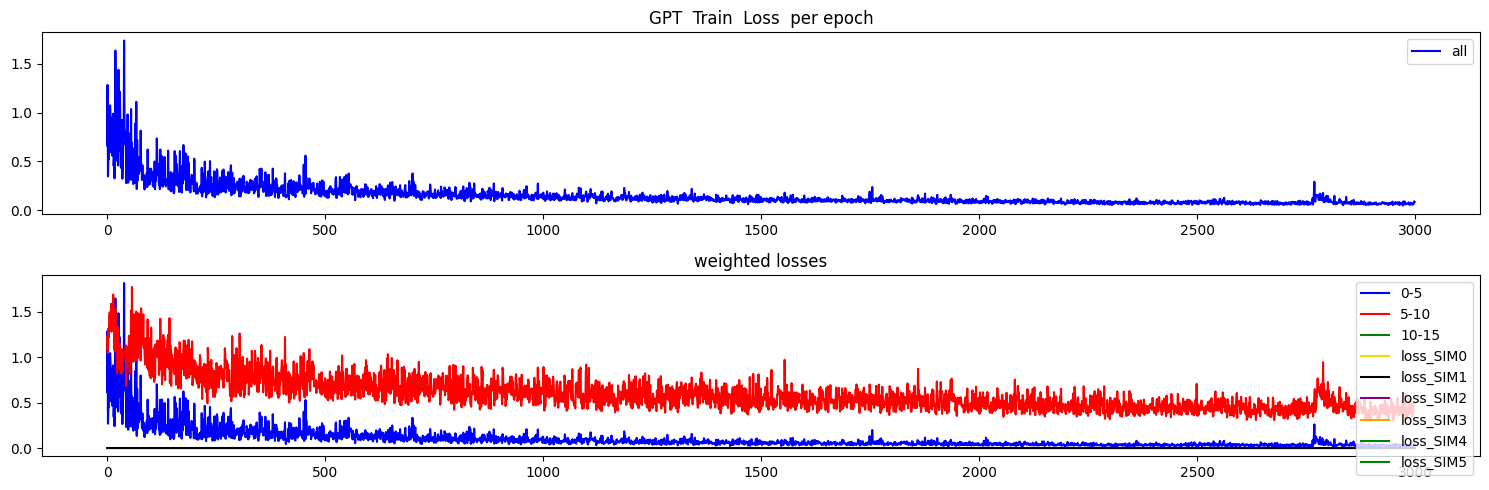

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


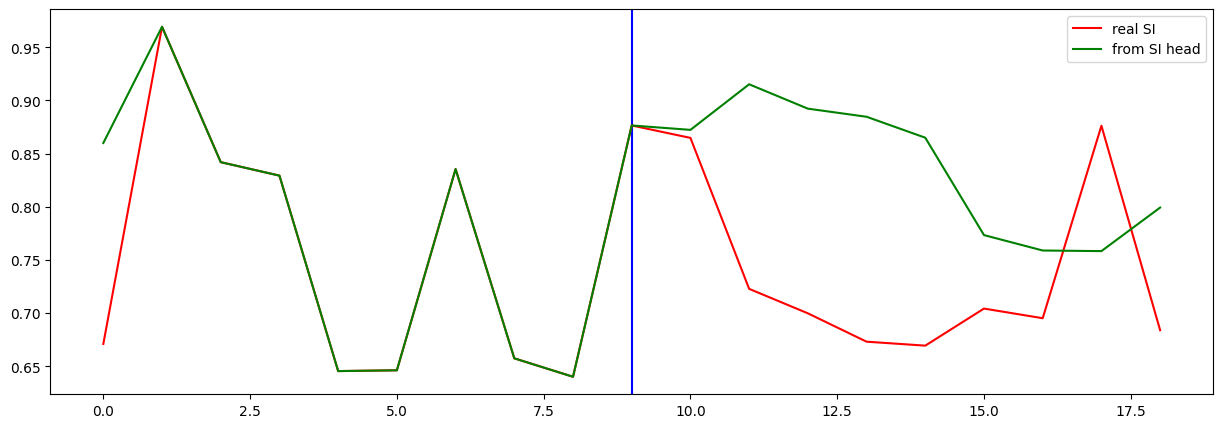

Testing R**2 - (all) - (no inputs):  0.9990095404847565
Testing R**2 - (f2) - SI full (no inputs):  -0.9886851927403124
Testing R**2 - SI head only (no inputs):  -5.919953468326699
0 ...index R**2 (no inputs):  -0.32648539730758563
1 ...index R**2 (no inputs):  -5.063830452023295
2 ...index R**2 (no inputs):  -0.9886851927403124
3 ...index R**2 (no inputs):  -401.50943729924217
4 ...index R**2 (no inputs):  -109.46188284981068
5 ...index R**2 (no inputs):  -0.6201320821726692
6 ...index R**2 (no inputs):  -1257.952409696787
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12476614861793855
10 ...index R**2 (no inputs):  -0.26921008262789514
11 ...index R**2 (no inputs):  -47.850516411421445
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -9.214944316169474
16 ...index R**2 (no inputs):  -5.052734405617311
17 ...index R**2 (no inputs):  -192.4497190

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.978976
Loss_SI: 0.9452211260795593 Loss_all: 1.2827730178833008
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.292705
Loss_SI: 0.2374546378850937 Loss_all: 0.7899541258811951
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.167190
Loss_SI: 0.11400122940540314 Loss_all: 0.6458858847618103
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.210482
Loss_SI: 0.1335967779159546 Loss_all: 0.9024448990821838
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.126600
Loss_SI: 0.07387997955083847 Loss_all: 0.6010769009590149
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.114927
Loss_SI: 0.05802318453788757 Loss_all: 0.6270626187324524
Prediction shape: torch.Size([32, 35])
===


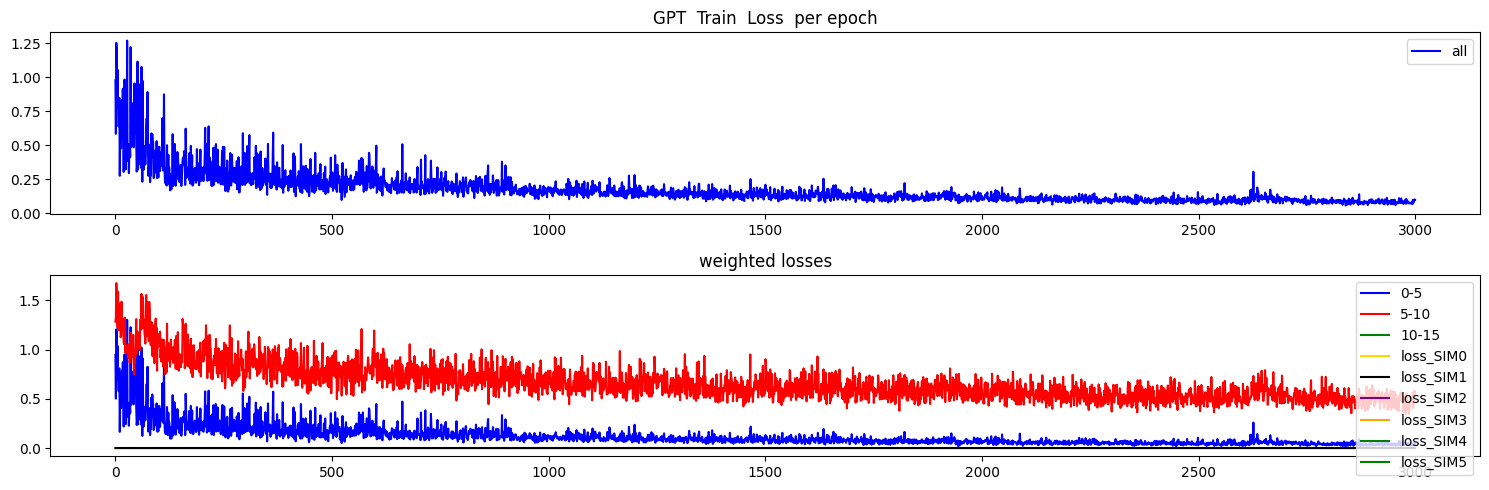

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


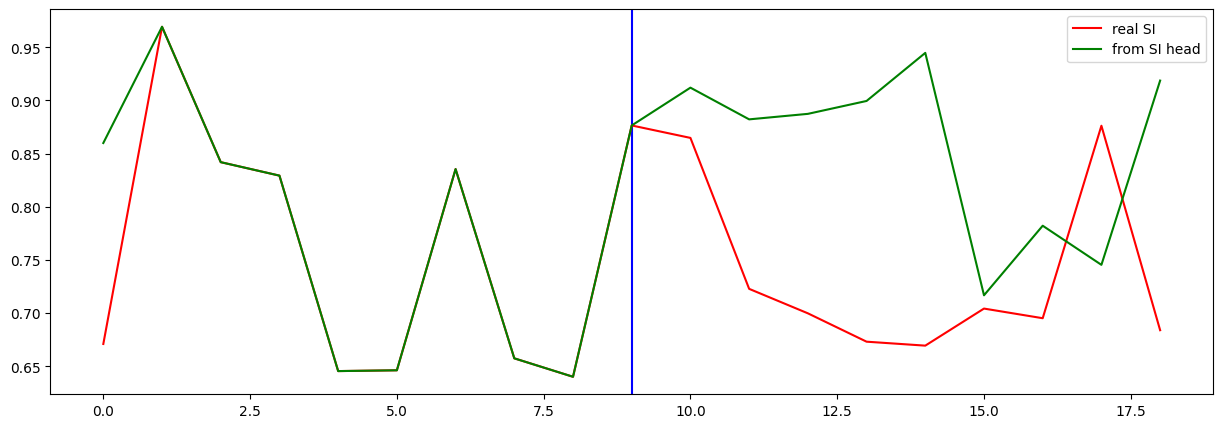

Testing R**2 - (all) - (no inputs):  0.9952621078050357
Testing R**2 - (f2) - SI full (no inputs):  -5.000564015325882
Testing R**2 - SI head only (no inputs):  -8.000959484440152
0 ...index R**2 (no inputs):  -0.6311535118126235
1 ...index R**2 (no inputs):  -0.852461869432928
2 ...index R**2 (no inputs):  -5.000564015325882
3 ...index R**2 (no inputs):  -121.16163439097494
4 ...index R**2 (no inputs):  -9.812024927399463
5 ...index R**2 (no inputs):  -8.52605623675978
6 ...index R**2 (no inputs):  -167.69771740950142
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.10703253510718413
10 ...index R**2 (no inputs):  0.03321914305674545
11 ...index R**2 (no inputs):  -24.49295491218003
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.03888639893814
16 ...index R**2 (no inputs):  -1.2608707033919568
17 ...index R**2 (no inputs):  -29.485340090292627

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.012230017659343728


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.07569513866658784


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.16038627901619473


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.03795780013482708



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: 0.1319996610739982
2 .....R² on first n steps: 0.2073878869381094
3 .....R² on first n steps: 0.3453009881329092
4 .....R² on first n steps: 0.062350490604827336
5 .....R² on first n steps: 0.10834748776610925
6 .....R² on first n steps: 0.12865628893570902
7 .....R² on first n steps: 0.06406849984521734
8 .....R² on first n steps: -0.002067951311885974
9 .....R² on first n steps: -0.012230017659343728


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: 0.04108235647694691
2 .....R² on first n steps: -0.782595977999448
3 .....R² on first n steps: -0.46728898042839284
4 .....R² on first n steps: -0.03683949419524524
5 .....R² on first n steps: -0.02511307463320933
6 .....R² on first n steps: -0.04259379134941477
7 .....R² on first n steps: -0.03872536737850618
8 .....R² on first n steps: -0.0653121886360224
9 .....R² on first n steps: -0.07569513866658784


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: 0.5973072988879907
2 .....R² on first n steps: -0.17516158643212898
3 .....R² on first n steps: -0.3927729098748338
4 .....R² on first n steps: -0.30028955443791405
5 .....R² on first n steps: -0.16394169722551943
6 .....R² on first n steps: -0.18646659127147558
7 .....R² on first n steps: -0.22221490622630147
8 .....R² on first n steps: -0.2130219811763543
9 .....R² on first n steps: -0.16038627901619473


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: 0.0067533832202884
2 .....R² on first n steps: -0.13322154571453182
3 .....R² on first n steps: -0.031140860514707436
4 .....R² on first n steps: 0.03651593411477971
5 .....R² on first n steps: 0.009412033404084363
6 .....R² on first n steps: 0.036551785882454335
7 .....R² on first n steps: 0.024814071554389416
8 .....R² on first n steps: -0.0318490235372586
9 .....R² on first n steps: -0.03795780013482708



## Plot


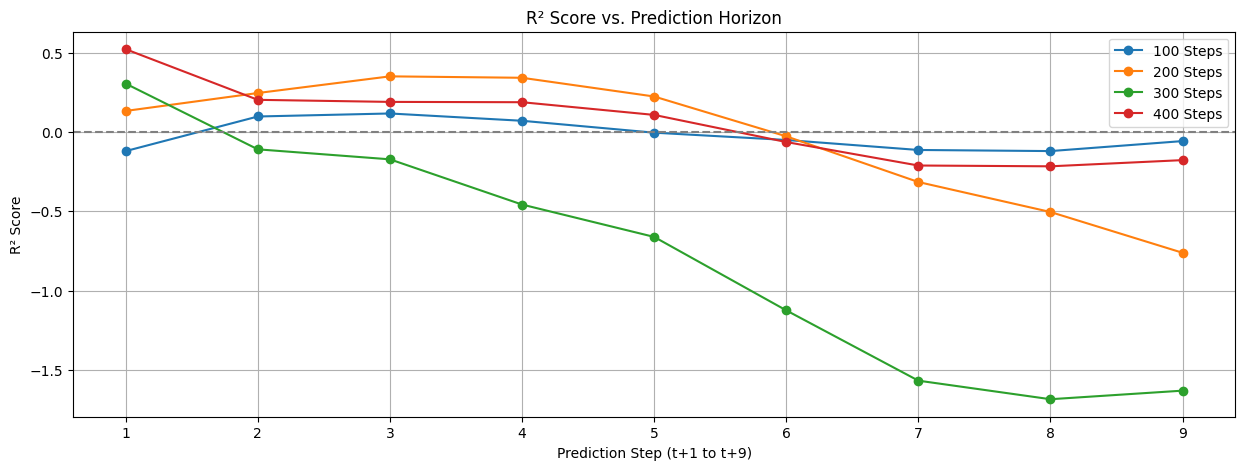

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
